# Исследование объявлений о продаже квартир


**Цель исследования:**
Найти интересные особенности и зависимости, которые существуют на рынке недвижимости

**Ход исследования:**

В файле "real_estate_data.csv" содержится архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические.

Т.к. часть данных записаны пользователями, они могут содержать ошибки. Ошибки также могут быть и в данных, полученных автоматически на основе картографических данных. Для начала нужен обзор данных. Далее, будем делать предобработку данных. Искать аномалии, пропущенные значения и т.д..

Для решения поставленных задач необходимо будет рассчитать и добавить в таблицу несколько показателей:
цена одного квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры (первый, последний, другой).

**Таким образом, исследование пройдёт в 5 этапов:**
- Обзор данных.
- Предобработка данных.
- Расчёты и добавление результатов в таблицу.
- Исследовательский анализ данных.
- Выводы

## Обзор данных

**Загрузим данные из файла в датафрейм**

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#открываем и читаем файл

# df=pd.read_csv('real_estate_data.csv', sep='\t')

try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

df.sample(10) #рассмотрим 10 рандомных строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22308,17,5700000.0,43.6,2017-01-21T00:00:00,1,NaN,4.0,17.9,1,False,...,11.3,NaN,Санкт-Петербург,20901.0,1146.0,1.0,590.0,2.0,151.0,675.0
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,NaN,...,5.5,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15935,20,5000000.0,62.0,2016-12-19T00:00:00,2,2.54,10.0,33.3,6,NaN,...,10.8,2.0,Петергоф,46010.0,34032.0,1.0,217.0,1.0,739.0,679.0
9897,2,12500000.0,110.0,2018-07-26T00:00:00,4,NaN,4.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,90.0
13707,8,4300000.0,60.3,2016-09-21T00:00:00,3,NaN,9.0,41.0,1,NaN,...,6.2,NaN,Санкт-Петербург,51708.0,16890.0,0.0,NaN,1.0,689.0,461.0
12016,12,7499000.0,90.0,2018-08-13T00:00:00,3,3.20,5.0,60.0,3,NaN,...,15.0,NaN,Санкт-Петербург,25768.0,4615.0,0.0,NaN,1.0,795.0,43.0
7647,8,23000000.0,83.0,2017-10-23T00:00:00,3,2.88,3.0,60.0,1,NaN,...,8.0,NaN,Санкт-Петербург,21219.0,1381.0,1.0,381.0,3.0,35.0,NaN
23176,2,6800000.0,69.2,2017-11-14T00:00:00,3,2.90,5.0,39.9,4,NaN,...,9.1,NaN,Санкт-Петербург,21523.0,3485.0,2.0,436.0,1.0,666.0,447.0
20512,13,3750000.0,45.4,2017-09-19T00:00:00,2,2.50,9.0,28.6,6,NaN,...,8.2,1.0,Санкт-Петербург,36799.0,11114.0,1.0,698.0,0.0,NaN,75.0
6421,7,30000000.0,118.0,2019-03-22T00:00:00,3,2.50,11.0,60.0,4,NaN,...,40.0,NaN,Санкт-Петербург,25834.0,4628.0,0.0,NaN,0.0,NaN,NaN


**Изучим общую информацию о полученном датафрейме**

In [3]:
#Рассмотрим полную информацию датафрейма:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Посмотрим краткую информацию датафрейма:
df.shape

(23699, 22)

In [5]:
#Рассмотрим максимальные, минимальные и средние и т.д. значения в столбцах
df.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


***Предварительный вывод на основе описательных данных:***

*last_price:* минимальная цена квартиры 12190 руб., что явно не характерно для рынка СПб и области. Похоже на ошибку. Максимальная цена 763 000 000 руб. очень большая, но элитного жилья возможна. Нужно иметь ввиду, что такие значения могут плохо влиять на среднее значение, вероятно, большие данные тоже стоит исключить.

*rooms:* минимальное число комнат 0 - ошибка. Как вариант это может быть квартира-студия. Нужно проверить.

*ceiling_height:* минимальная высота потолков 1 метр, максимальная - 100 метров. Явно ошибка. Такие значения буду удалять.

*floors_total:* max количество этажей 60 похоже на ошибку, так как в Санк Петербурге нет таких высоких зданий. Такие объекты следует удалить.

*living_area:* min жилая площадь 2 м² невозможна, ошибка. Такие объекты следует удалить.

*kitchen_area:* min площадь кухни 1,3 м² невозможна, ошибка. Такие объекты следует удалить.

*airports_nearest:* min расстояние до аэропорта 0 м невозможно. Два варианта событий: либо нет данных и заполнили нулем, либо ошибка. Такие объекты следует удалить.

*days_exposition:* минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день или снятие объявления по другой причине - допустимый вариант, но, если таких объявлений много, то такие данные могут негативно влиять на среднее. Максимальное значение - 1580 дней (больше 4-х лет) также может негативно влиять на среднее время.

In [6]:
# посмотрим количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

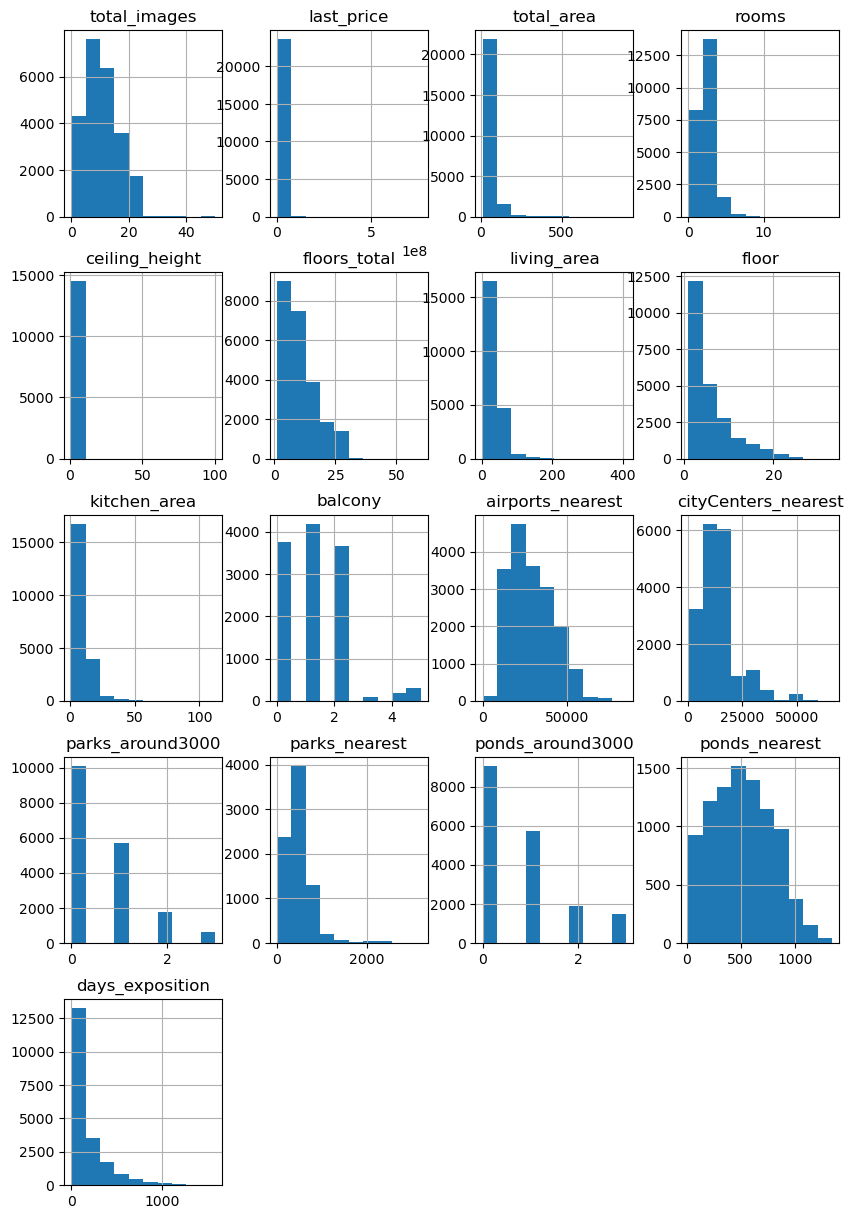

In [7]:
# построим гистораммы для датасета
df.hist(figsize=(10, 15))
plt.show()

### Вывод

1. Прочитала файл
2. Заметила некорректные названия некоторых столбцов, приведу их к единому стилю.
3. Необходимо изменить тип данных в столбцах:

last_price: вещественное число float64 в int64

first_day_exposition: строка object в date

floors_total: вещественное число float64, предполагает целое число (этажей) в int64

is_apartment: строка object, по вводным данным булев тип в bool

balcony: вещественное число float64, предполагает целое число (балконов) в int64

parks_around3000: вещественное число float64, предполагает целое число (парков) в int64

ponds_around3000: вещественное число float64, предполагает целое число (водоемов) в int64

4. Выявила большое количество пропусков в большинстве столбцов.

5. На основе вывода по описательным данным, буду корректировать некоторые значения.


## Предобработка данных

**Исправим стилистические ошибки в названии некоторых столбцов**

In [8]:
#переименовываем
df=df.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                      'parks_around3000': 'parks_around_3000',
                      'ponds_around3000': 'ponds_around_3000'})
#проверяем
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Обработка пропусков

In [9]:
# посмотрим еще раз количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 из 22 стобцов обнаружены пропуски, рассмотрим каждый из них, чтобы проанализировать оставлять их или заменять

**ceiling_height:** 9195 пропусков, для более чем трети объектов не указана высота потолков. Хотя данные по этому столбцу для нашего исследования не так важны, но мы вполне можем заменить все пропуски *на медианное значение*.

**floors_total:** 86 пропусков. Пропусков мало, на исследование не повлияют. *Пропуски оставляем.*

**living_area:** 1903 пропуска. В некоторых объявлениях продавцы указали общую площадь объекта недвижимости, но не указали ее распределение на жилую/нежилую. Вероятно, люди не помнят точную площадь именной жилой части, поэтому не пишут ее. Для таких объявлений я заполню отсутствующую информацию медианами, через значение, отражающее медианную долю кухни/жилой площади в общей площади квартиры. Хоть количество пропусков и не большое, но нам важны эти данные для дальнейшего исследования.

**is_apartment:** 20924 пропусков. Вероятно, все у кого площадь жилая, пропускали этот пункт. Т.к. в этом столбце булев тип данных, *пропуски можно заменить на False.*

**kitchen_area:** 2278 пропусков. Вероятно, пользователи не указывают точный метраж кухни, т.к. не знают его. Или, что скорее вероятно, не указывают в тех случая когда квартира имеют планировку студия (столбец studio и open_plan), в таком случае площадь кухни входит в общую площадь жилья. Кол-во пропусков не большое, но нам важны эти данные для дальнейшего исследования. Совместно со столбцом living_area заполню отсутствующую информацию медианами, через значение, отражающее медианную долю кухни/жилой площади в общей площади квартиры.

**balcony:** 11519 пропусков. Вероятно, люди при отсутствии балконов их не указывают. *Думаю можно заменить пропуски нулями.*

**locality_name:** 49 пропусков. Кол-во пропусков мало, на исследование не повлияют. Удалим строки без города, они будут мешать в анализе и даже пользователям не понятно где вообще эти квартиры находятся.

**airports_nearest:** 5542 пропусков. Вероятно, пропуски возникли в связи с отсутствием данных. *Поэтому пропуски оставим.*

**city_centers_nearest:** 5519 пропусков. Вероятно, пропуски возникли в связи с отсутствием данных. Для дальнейшего исследования эти данные важны, поэтому буду заполнять пропуски медианным значением относительно населенных пунктов.

**parks_around_3000:** 5518 пропусков. Число пропусков совпадает с числом пропусков в ponds_around_3000, что подозрительно. Пропуски в столбце на задачи исследования не влияют, *оставим их.*

**parks_nearest:** 15620 пропусков. Более половины объектов не имеют информации о ближайшем парке. Скорее всего, информация не была получена. Пропуски в столбце на задачи исследования не влияют, *оставим их.*

**ponds_around_3000:** 5518 пропусков. Число совпадает с числом пропусков parks_around_3000, что выглядит подозрительно. Пропуски в столбце на исследование не влияют, *оставим их.*

**ponds_nearest:** 14589 пропусков. Больше половины объектов не имеют информации о ближайшем парке. Пропуски в столбце на задачи исследования не влияют, *оставим их.*

**days_exposition:** 3181 пропусков. Достаточно большая часть объектов не содержит информации о количестве дней размещения объявления, подозрительно, т.к. эти данные должны быть получены автоматом. Возможно, это техническая ошибка, которая произошла в момент сбора/выгрузки данных. Данные этого столбца важны для исследования. К сожалению заполнить значения нечем, *оставим пропуски.*

***Итог: Обработаем пропуски в столбцах is_apartment (меняем на False) и balcony (меняем на 0), ceiling_height меняем на медиану, living_area и kitchen_area заполняем пропуски, locality_name - удалим строки с пропусками, чтобы не мешали исследованию, city_centers_nearest - заполняем пропуски медианным значением относительно населенных пунктов***

In [10]:
#заменяем пропуски на False
df['is_apartment'].fillna(False, inplace=True)
#проверяем
df['is_apartment'].isna().sum()

0

In [11]:
#заменяем пропуски на 0
df['balcony'].fillna(0, inplace=True)
#проверяем
df['balcony'].isna().sum()

0

In [12]:
#удаляю 86 строк, в которых не заполнено количество этажей.
df = df.dropna(subset=['floors_total'])
df['floors_total'].isna().sum()

0

Нужно учитывать что все дома разного года постройки и высота потолков может быть разная, можно предположить что от этажности дома зависит высота потолков, поэтому пропуски в столбце "ceiling_height" заменим на медианы значений высот потолков по этажности дома. Для этого напишем цикл перебирающий уникальные значения столбца 'floors_total' и в случае пропуска в столбце 'ceiling_height', заменит на медианное значение высоты потолков по каждому этажу

In [13]:
median = df.groupby('floors_total')['ceiling_height'].median()
for d in df['floors_total'].unique():
    df.loc[(df['floors_total'] == d) & (df['ceiling_height'].isna()), 'ceiling_height'] = median[d]

df['ceiling_height'].isna().sum()

1

In [14]:
#удалю строки без города, они будут мешать в анализе и даже пользователям не понятно где вообще эти квартиры находятся.
df= df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

Пропуски по площади кухни могли образоваться от того что человек не знад точного значения либо квартира имеет планировку студии и тогда кухня входит в общую площадь квартиры.  Пропуски для студий и открытой планировки заполню нулями, оставшиеся - заменю на медианы значений площади кухни по каждому значению количества комнат в квартире. Понадобится цикл, перебирающий уникальные значения столбца rooms и в случае пропуска в столбце kitchen_area, заменит на медианное значение площади кухни по данному количеству комнат.

In [15]:
df.loc[df['studio'] == 1, 'kitchen_area'] = 0 
df.loc[df['open_plan'] == 1, 'kitchen_area'] = 0 
kitchen=df.groupby('rooms')['kitchen_area'].median()
for rooms in kitchen.index:
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == rooms), 'kitchen_area'] =\
    kitchen.loc[rooms]

df['kitchen_area'].isna().sum()

0

In [16]:
#удалим оставшиеся пропуски
df=df.dropna(subset=['kitchen_area'])

Пропуски по жилой площади аналогично заполним медианным значением только в зависимости от rooms

In [17]:
living = df.groupby('rooms')['living_area'].median()
for rooms in living.index:
    df.loc[(df['rooms'] == rooms), 'living_area'] = df.loc[(df['rooms'] == rooms),\
                                                           'living_area'].fillna(living[rooms])

df['living_area'].isna().sum()

0

In [18]:
df.query('total_area*0.95 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.60,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
164,6,800000.0,40.3,2018-06-25T00:00:00,2,2.80,3.0,30.5,1,False,...,8.7,2.0,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,...,6.2,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,...,9.0,0.0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.55,5.0,42.2,2,False,...,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23420,1,3345000.0,29.9,2018-08-09T00:00:00,1,2.70,27.0,20.3,3,False,...,9.0,1.0,посёлок Парголово,52912.0,19089.0,0.0,NaN,0.0,NaN,247.0
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,2.60,10.0,18.0,2,False,...,9.0,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0
23613,4,3950000.0,52.0,2018-03-04T00:00:00,3,2.55,5.0,45.0,2,False,...,9.5,0.0,посёлок Парголово,55549.0,21223.0,0.0,NaN,0.0,NaN,45.0


После проверки корректности заполненных данных по жилой площади и площади кухни мы видим небольшой выброс, относительно всего объема данных это небольшое значение (около 3,5%), поэтому я считаю что новый способ заполнения синтетическими данными столбцов вполне оптимален. 

In [19]:
#заполняю пропуски в столбце city_centers_nearest медианным значением относительно населенных пунктов
for l in df['locality_name'].unique():
    df.loc[(df['locality_name']==l)&(df['city_centers_nearest'].isna()),'city_centers_nearest'] = \
    df.loc[df['locality_name']==l,'city_centers_nearest'].median()

### Преобразуем типы данных

In [20]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [21]:
# преобразуем столбцы  к целочисленному типу данных int
for l in ['last_price', 'floors_total', 'balcony']:
    df[l]=df[l].astype('int64')

# проверяем
df[['last_price', 'floors_total', 'balcony']].dtypes

last_price      int64
floors_total    int64
balcony         int64
dtype: object

Формат даты оставим без времени, так как время нигде не указано

In [22]:
# преобразуем first_day_exposition к типу datetime с помощью pd.to_datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
# проверяем
df['first_day_exposition'].dtypes

dtype('<M8[ns]')

In [23]:
#окончательно проверим все столбцы
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Обработка дубликатов

In [24]:
# проверим явные дубликаты и выведем их сумму
df.duplicated().sum()

0

**Явных дубликатов нет. Займемся не явными дубликами**

In [25]:
#проверим неявные дубликаты в нужном нам солбце locality_name
#выведем уникальные значения в алфавитном порядке
set(df['locality_name'].unique())

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Сразу же бросается в глаза что "поселок" и "посёлок" дублируются

In [26]:
#заменяем поселок на посёлок через replace
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок')
#смотрим на названия еще раз
set(df['locality_name'].unique())

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской посёлок Большая Ижора',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня

Вижу еще несколько дубликатов, приведем названия к одному типу

'посёлок при железнодорожной станции Вещево',
 'посёлок при железнодорожной станции Приветнинское',
 'посёлок станции Вещево',
 'посёлок станции Громово',
 'посёлок станции Корнево',
 'посёлок станции Лужайка',
 'посёлок станции Приветнинское',

In [27]:
# Через replace приведем к одному значению посёлок
df=df.replace({'locality_name':
 {'Никольское': 'село Никольское',
  'городской посёлок Советский': 'посёлок городского типа Советский',
  'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора',
  'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский',
  'городской посёлок Мга':'посёлок городского типа Мга',
  'городской посёлок Назия':'посёлок городского типа Назия',
  'городской посёлок Павлово':'посёлок городского типа Павлово',
  'городской посёлок Рощино':'посёлок городского типа Рощино',
  'городской посёлок Советский':'посёлок городского типа Советский',
  'посёлок при железнодорожной станции Вещево':'посёлок станции Вещево',
  'посёлок при железнодорожной станции Приветнинское':'посёлок станции Приветнинское'}})
#set(df['locality_name'].unique())
#проверила еще раз все названия, дубликатов не нашла

Изучив картографические данные относительно Кудрово, выяснилось, что это один и тот же населенный пункт, до 2018 года это была деревня, а теперь это город Кудрово. Соответвенно эти наименования можно тоже объединить.

In [28]:
df['locality_name'] = df['locality_name'].replace('деревня Кудрово','Кудрово')
#смотрим на названия еще раз
set(df['locality_name'].unique())

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Новоселье',
 'городской посёлок Свирьстрой',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',


Далее посморим на еще один нужный нам столбец с высотой потолков ceiling_height, мы уже выделили в начале, что минимальная высота потолков 1 метр, максимальная - 100 метров. Явно ошибка.


In [29]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Можно заметить, что встречаются также потолки размером 20-30 метров. Что тоже аномалия. Думаю можно предположить, что на самом деле это вещественные значения: 2-3 метра. Следовательно нужно поделить такие значения на 10.

In [30]:
# Значения больше 20  поделю на 10
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height'] / 10
#проверяем
df['ceiling_height'].describe()

count    23564.000000
mean         2.709956
std          0.277098
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         14.850000
Name: ceiling_height, dtype: float64

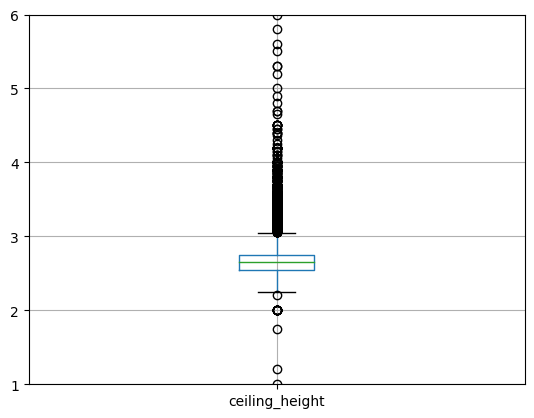

In [31]:
#Для наглядности построим диаграмму размаха высоты потолков

df.boxplot(column='ceiling_height')
plt.ylim(1, 6)
plt.show()

Из графика видно, значения менее 2,3 метра и более 3,1 метра - выбросы. Поэтому можем оставить, только строки с высотой потолков от 2,3 до 3,5 метров

In [32]:
df=df.query('2.3 <= ceiling_height <= 3.5')

Далее рассмотрим сотлбец с этажностью домов - floors_total, в нем мы так же заметили аномальные значения. По интернет данным самое высокое жилое здание в Санкт-Петербурге - 37 этажей, поэтому удалим строки с кол-вом этажей больше 37

In [33]:
df['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 34, 35, 36, 52, 60],
      dtype=int64)

In [34]:
#оставляю строки с этажами < 37
df= df.query('floors_total < 37 or floors_total.isna()')
df['floors_total'].max()

36

### **Вывод**

Cделали предобработку данных, а именно:

- Изменили типы данных

- Привели имена столбцов к единому стилю

- Обработали явные и неявные дубликаты

- Обработали пропуски

- Удалили часть строк с аномальными значениями, которые не повлияют на итоги исследования

In [35]:
df['rooms'].value_counts().to_frame()

,rooms
1,7963
2,7828
3,5696
4,1130
5,288
0,192
6,91
7,47
8,9
9,8


Видно что квартир с комнатами больше 7-ми достаточно мало, поэтому чтобы избавиться от аномальных значений, которые не повлияют на ход исследования, избавимся от строк с количеством комнат больше 7.

In [36]:
df=df.query('rooms < 7')
df['rooms'].value_counts().to_frame()

,rooms
1,7963
2,7828
3,5696
4,1130
5,288
0,192
6,91


Изучим аномальные значения в общей площади квартиры

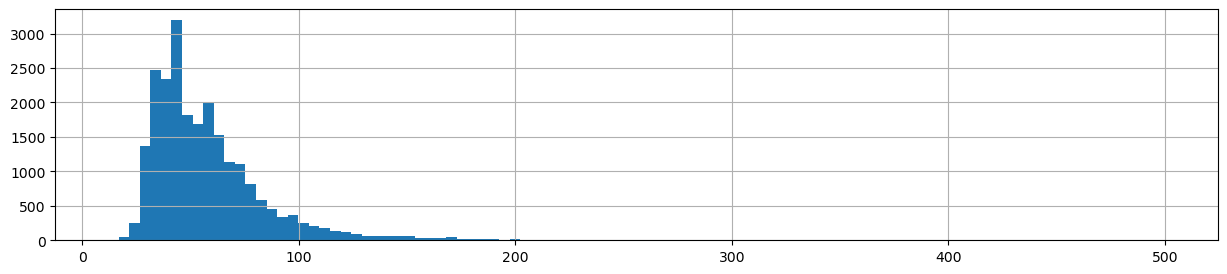

In [37]:
df['total_area'].hist(bins = 100, figsize = (15,3));

Все квартиры с площадью до 20 и больше 200 квадратов можно считать редкостью

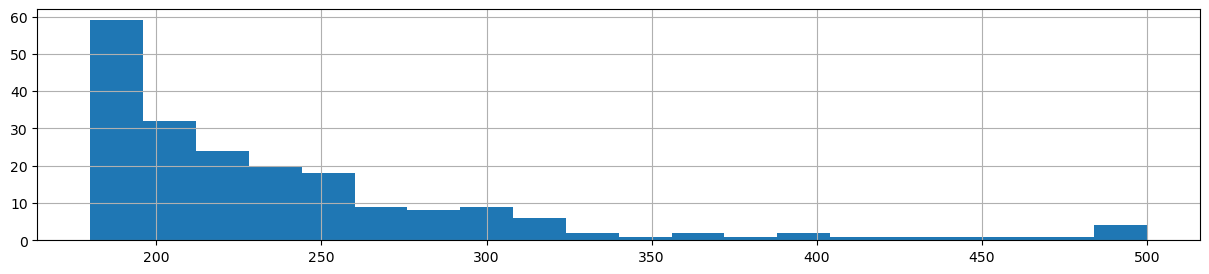

In [38]:
df['total_area'].hist(bins = 20, figsize = (15,3), range = (180,500));

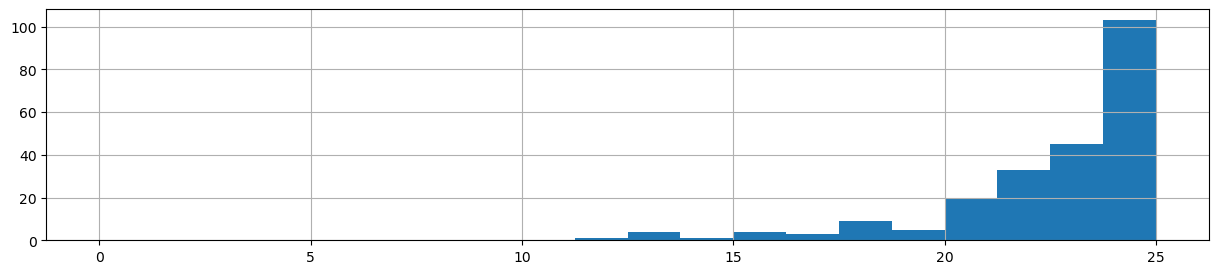

In [39]:
df['total_area'].hist(bins = 20, figsize = (15,3), range = (0,25));

In [40]:
df['total_area'].describe()

count    23188.000000
mean        58.850593
std         30.604169
min         12.000000
25%         40.000000
50%         51.500000
75%         68.525000
max        500.000000
Name: total_area, dtype: float64

In [41]:
df=df.query('20 <= total_area <= 200')
df['total_area'].describe()

count    23033.000000
mean        57.737093
std         25.871417
min         20.000000
25%         40.000000
50%         51.300000
75%         68.000000
max        200.000000
Name: total_area, dtype: float64

In [42]:
23170-23016


154

При удалении аномальных значений мы теряем всего 0,6 % от общей массы данных, это допустимое значение

Рассмтрим подробнее аномальные значения по жилой площади

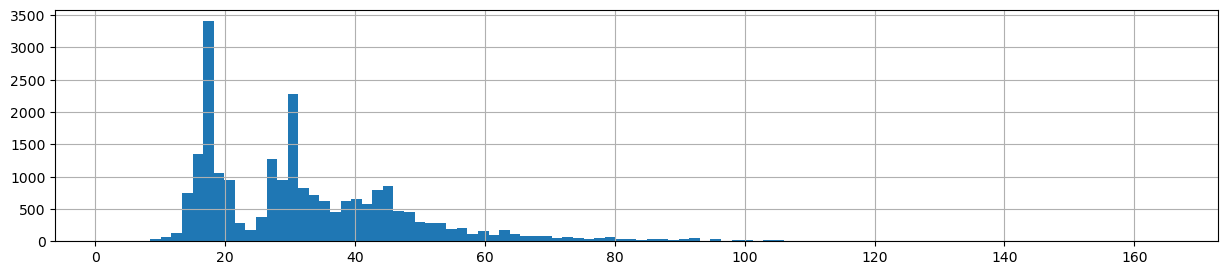

In [43]:
df['living_area'].hist(bins = 100, figsize = (15,3));

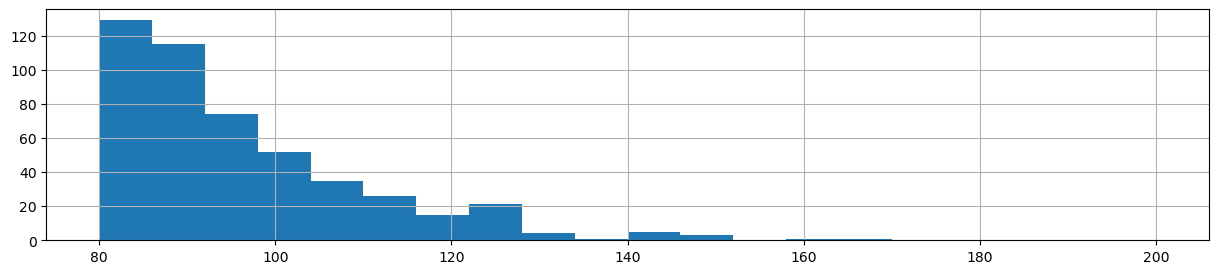

In [44]:
df['living_area'].hist(bins = 20, figsize = (15,3), range = (80,200));

<Axes: >

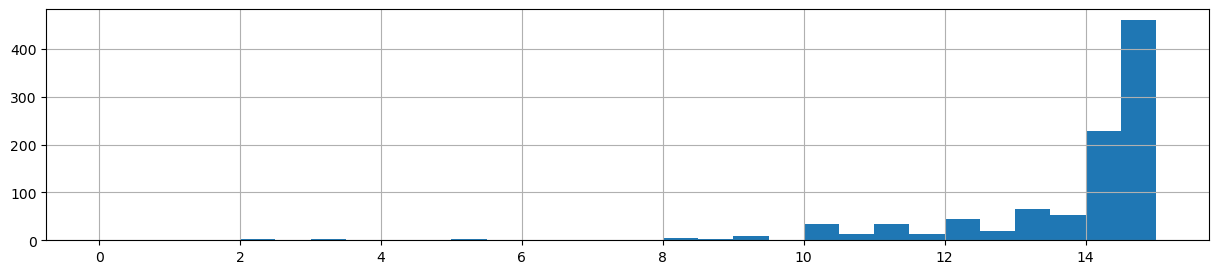

In [45]:
df['living_area'].hist(bins = 30, figsize = (15,3), range = (0,15))

Все квартиры с жилой площадью до 10 и больше 80 квадратов можно считать редкостью

In [46]:
df['living_area'].describe()

count    23033.000000
mean        32.854399
std         16.715042
min          2.000000
25%         18.300000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

In [47]:
df=df.query('10 <=living_area <= 80')
df['living_area'].describe()

count    22556.000000
mean        31.593095
std         14.005604
min         10.000000
25%         18.135000
50%         30.000000
75%         41.000000
max         80.000000
Name: living_area, dtype: float64

In [48]:
23016-22539

477

При удалении аномальных значений мы теряем всего 2 % от общей массы данных, это допустимое значение

Рассмтрим подробнее аномальные значения по площади кухни

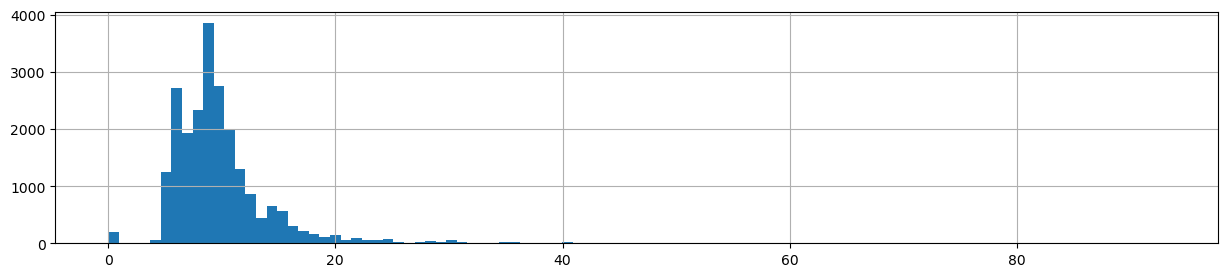

In [49]:
df['kitchen_area'].hist(bins = 100, figsize = (15,3));

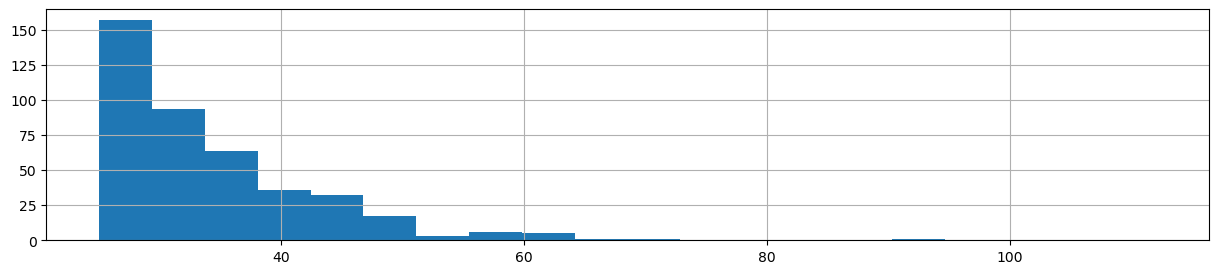

In [50]:
df['kitchen_area'].hist(bins =20, figsize = (15,3), range = (25,112));

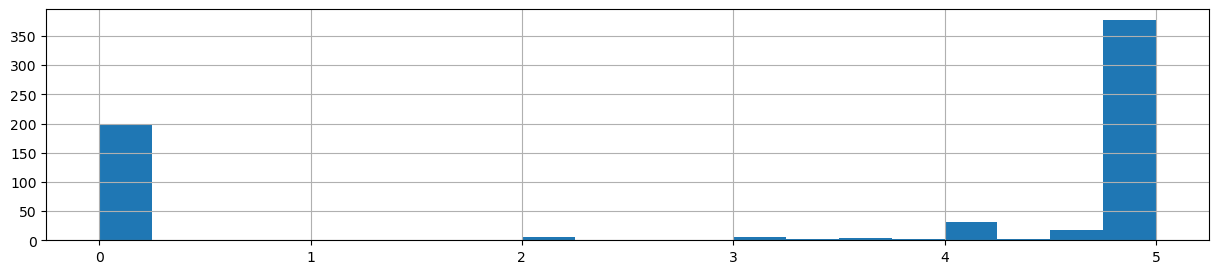

In [51]:
df['kitchen_area'].hist(bins =20, figsize = (15,3), range = (0,5));

Все квартиры с площадью квартиры до 4 и больше 40 квадратов можно считать редкостью

In [52]:
df['kitchen_area'].describe()

count    22556.000000
mean         9.979871
std          4.896109
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         93.000000
Name: kitchen_area, dtype: float64

In [53]:
df=df.query('4<=kitchen_area <= 40')
df['kitchen_area'].describe()

count    22253.000000
mean         9.940879
std          4.224736
min          4.000000
25%          7.100000
50%          9.000000
75%         11.000000
max         40.000000
Name: kitchen_area, dtype: float64

In [54]:
22539-22299

240

При удалении аномальных значений мы теряем всего 1 % от общей массы данных, это допустимое значение

Рассмотрим аномалии по количеству дней публикации объявления.


In [55]:
df['days_exposition'].describe()

count    19356.000000
mean       177.264982
std        215.594203
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [56]:
df[df['days_exposition']!=0]['days_exposition'].value_counts()

45.0      851
60.0      528
7.0       223
30.0      195
4.0       167
         ... 
793.0       1
1434.0      1
1231.0      1
739.0       1
971.0       1
Name: days_exposition, Length: 1113, dtype: int64

(1.0, 1000.0)

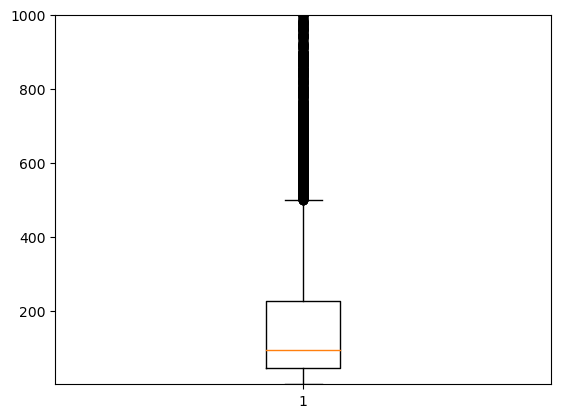

In [57]:
plt.boxplot(df[df['days_exposition']>0]['days_exposition'])
plt.ylim(1,1000)

<Axes: ylabel='Frequency'>

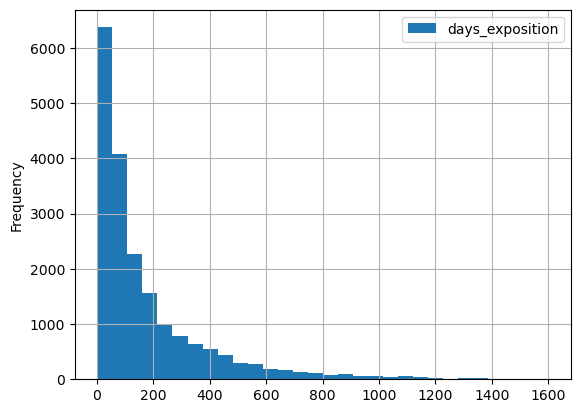

In [58]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

<Axes: ylabel='Frequency'>

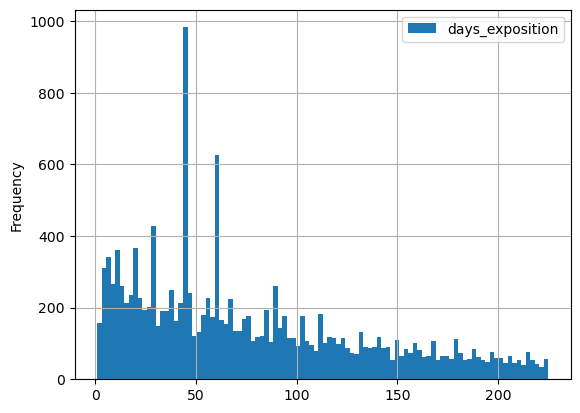

In [59]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,225))

На данных графиках видно, что распределение равномерное, с редкими выбросами. 

Среднее значение равняется 177 дням, а медиана равна 93 дням. 

Выявлены выбивающиеся значения и методом value_counts подтверждаем это - аномалии находятся на 45, 60, 7, 30, 4 днях.

Данные аномалии связаны с тем, что сроки публикации на яндексе соответсвуют этим дням. 

- Продажа комнаты - 45 дней

- Продажа дома, участка или гаража - 90 дней

- Аренда комнаты - 7 дней

- Аренда комнаты, участка или гаража - 30 дней

- Аренда и продажа коммерческого объекта - 60 дней

- Продажа квартиры: до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней

- Аренда квартиры: до 20 тыс/м — 7 дней, от 20 до 40 тыс/м — 14 дней, от 40 тыс/м — 21 день

- Аренда посуточная: Квартира, Комната, Дом / участок, Гараж - 60 дней.

На графике boxplot видно, что "нормальные" данные находятся в диапазоне 1 - 225, выбросы находятся на отметке 500 дней и больше. 

Публикации снятые в первый день - являются быстрыми, те, что держатся 500 дней и больше - необычно долго. 

Можно было бы убрать значения, где квартиры продаются 500 дней и больше, но это слишком большой процент от общего объема данных, плюс нужно учитывать пропуски.



In [60]:
len(df.query('days_exposition > 500'))/len(df)*100

7.0911787174762955

In [61]:
df['days_exposition'].quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 

0.0012       3.000
0.0100       4.000
0.5000      94.000
0.9900    1051.800
0.9988    1361.774
Name: days_exposition, dtype: float64

Самым оптимальным решением будет отбросить строки по квантилю 0,99 это 1049 дней

In [62]:
df['days_exposition'].head(20)

0       NaN
1      81.0
2     558.0
3     424.0
5      55.0
6     155.0
7       NaN
8     189.0
9     289.0
10    137.0
11      7.0
12     90.0
13    366.0
14    203.0
15     19.0
16    397.0
17    571.0
18    168.0
19     97.0
20     74.0
Name: days_exposition, dtype: float64

In [63]:
df = df.loc[(df['days_exposition'] < 1049)|(df['days_exposition'].isna())] 


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22057 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22057 non-null  int64         
 1   last_price            22057 non-null  int64         
 2   total_area            22057 non-null  float64       
 3   first_day_exposition  22057 non-null  datetime64[ns]
 4   rooms                 22057 non-null  int64         
 5   ceiling_height        22057 non-null  float64       
 6   floors_total          22057 non-null  int64         
 7   living_area           22057 non-null  float64       
 8   floor                 22057 non-null  int64         
 9   is_apartment          22057 non-null  bool          
 10  studio                22057 non-null  bool          
 11  open_plan             22057 non-null  bool          
 12  kitchen_area          22057 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Необходимо добавить в таблицу новые столбцы со следующими параметрами (пропишу сразу же новые названия):

цена одного квадратного метра - **price_square_meter**

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) - **week_publication**

месяц публикации объявления - **month_publication**

год публикации объявления - **year_publication**

тип этажа квартиры (значения — «‎первый», «последний», «другой») - **type_floor**

расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) - **city_centers_nearest_km**

In [65]:
#добавляю столбец с ценой за 1 кв.м.
df['price_square_meter'] = df['last_price'] / df['total_area']

#сокращаю полученную цену до сотых (копеек)
df['price_square_meter'] = df['price_square_meter'].round(2)
#проверяю
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter
16658,17,3490000,35.0,2018-04-04,1,2.55,9,20.5,6,False,...,0,Санкт-Петербург,14579.0,13119.0,0.0,NaN,1.0,151.0,4.0,99714.29
5670,10,9600000,78.0,2017-09-27,2,2.80,3,36.0,1,False,...,0,Санкт-Петербург,37860.0,11432.0,1.0,223.0,1.0,294.0,447.0,123076.92
16624,17,12000000,103.1,2019-03-28,3,2.55,5,66.1,2,False,...,0,Санкт-Петербург,21385.0,4013.0,0.0,NaN,1.0,721.0,NaN,116391.85
11488,6,2720000,37.6,2018-07-07,1,2.53,8,18.4,1,False,...,0,Красное Село,25341.0,28765.0,0.0,NaN,0.0,NaN,160.0,72340.43
10152,10,9000000,55.0,2017-08-06,2,3.00,7,33.0,5,False,...,1,Санкт-Петербург,19505.0,14770.0,3.0,149.0,2.0,319.0,78.0,163636.36


In [66]:
#добавляю столбец с днем недели публикации объявления
df['week_publication'] = df['first_day_exposition'].dt.weekday

#добавляю столбец с месяцем публикации объявления
df['month_publication'] = df['first_day_exposition'].dt.month

#добавляю столбец с годом публикации объявления
df['year_publication'] = df['first_day_exposition'].dt.year
#проверяю
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_publication,month_publication,year_publication
5010,16,6100000,46.9,2019-03-29,2,2.55,9,30.6,8,False,...,11882.0,1.0,558.0,0.0,NaN,NaN,130063.97,4,3,2019
3664,10,6500000,36.0,2017-04-17,1,2.65,12,20.0,10,False,...,9150.0,1.0,243.0,3.0,170.0,11.0,180555.56,0,4,2017
12051,10,2100000,44.6,2018-01-20,2,2.95,3,27.3,2,False,...,NaN,NaN,NaN,NaN,NaN,55.0,47085.20,5,1,2018
21321,7,4200000,35.0,2017-09-26,1,2.70,16,16.0,14,False,...,14102.0,0.0,NaN,0.0,NaN,70.0,120000.00,1,9,2017
5366,9,5265000,73.0,2015-12-07,4,2.56,9,49.0,8,False,...,10894.0,2.0,614.0,0.0,NaN,213.0,72123.29,0,12,2015


Для того чтобы добавить столбец с типом этажности, нужно создать функцию с категорийностью значений: «‎первый», «последний», «другой»

In [67]:
#создаю функцию для категоризации этажности в доме
def get_type_floor (row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif floor <= 0:
        return 'ошибка'
    else:
        return 'другой'

#добавляю столбец с типом этажа квартиры
df['type_floor'] = df.apply(get_type_floor, axis=1)
#проверяем
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_publication,month_publication,year_publication,type_floor
9762,6,7730000,67.5,2018-03-21,2,2.70,25,30.5,3,False,...,2.0,468.0,0.0,NaN,203.0,114518.52,2,3,2018,другой
10788,11,3200000,44.4,2017-09-17,2,2.50,5,26.7,3,False,...,1.0,427.0,2.0,518.0,59.0,72072.07,6,9,2017,другой
11714,9,10650000,72.0,2017-11-04,1,2.60,10,17.6,6,False,...,1.0,738.0,1.0,788.0,113.0,147916.67,5,11,2017,другой
15391,15,6950000,43.6,2018-03-02,1,2.60,10,14.7,9,False,...,0.0,NaN,3.0,153.0,165.0,159403.67,4,3,2018,другой
22787,5,4200000,62.8,2018-10-21,2,2.55,9,37.8,5,False,...,0.0,NaN,1.0,300.0,23.0,66878.98,6,10,2018,другой


In [68]:
#добавляю столбец city_centers_nearest_km
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000)
#проверяю
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_publication,month_publication,year_publication,type_floor,city_centers_nearest_km
15535,16,2100000,36.1,2018-03-26,2,2.50,2,23.6,1,False,...,NaN,NaN,NaN,263.0,58171.75,0,3,2018,первый,NaN
1755,19,6000000,77.7,2016-06-03,4,2.50,9,55.1,4,False,...,257.0,1.0,856.0,269.0,77220.08,4,6,2016,другой,12.0
13681,14,1900000,42.0,2018-03-19,2,2.70,2,33.0,2,False,...,NaN,NaN,NaN,61.0,45238.10,0,3,2018,последний,NaN
15267,0,6700000,81.0,2017-04-14,3,2.55,5,45.0,3,False,...,702.0,1.0,974.0,42.0,82716.05,4,4,2017,другой,8.0
14685,20,4490000,44.6,2017-09-04,2,2.55,9,28.0,5,False,...,NaN,0.0,NaN,108.0,100672.65,0,9,2017,другой,13.0


### **Вывод:**

Добавила необходимые столбцы и произвела расчеты по ним.

Нужно отметить, что из-за пропусков в исходных данных, в расчетных значениях также есть пропуски.

Например, в столбце floor_category для 85 строк категория этажа могла определиться неверно, т.к. значения количества этажей для этих объектов отсутствуют.

Но доля возможных ошибок очень мала, поэтому на результаты исследования они не повлияют.

## Исследовательский анализ данных

### Изучение параметров объектов недвижимости

**Общая площадь - total_area**

In [69]:
#описательная часть этого столбца
df['total_area'].describe()

count    22057.000000
mean        55.841142
std         21.811737
min         20.000000
25%         40.000000
50%         51.000000
75%         66.700000
max        199.200000
Name: total_area, dtype: float64

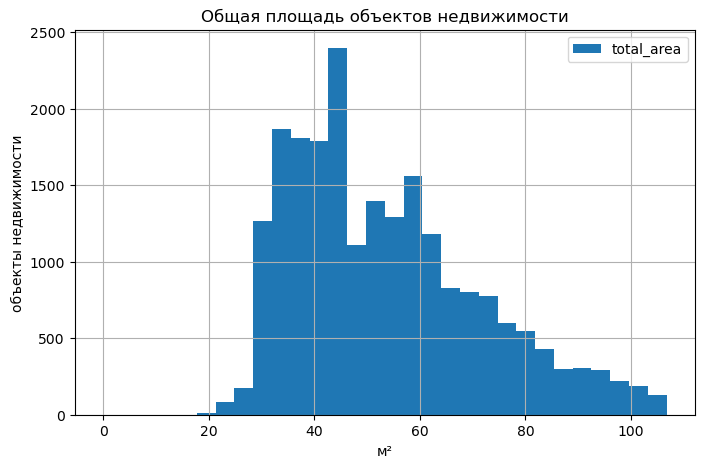

In [70]:
#можно рассчитать q1, q3 и iqr чтобы построить график без выбросов
q1 = df['total_area'].quantile(.25) # первый квартиль q1
q3 = df['total_area'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr

#строю гистограмму площади
df['total_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют площадь от 30 до 65 м².
Самый распространенный вариант - около 45 м². Площадь объектов более 100 м² встречается редко. С площадью меньше 30 м² еще реже. Среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений. График получается растянутым.

**Жилая площадь - living_area**

In [71]:
#описательная часть
df['living_area'].describe()

count    22057.000000
mean        31.610880
std         13.951508
min         10.000000
25%         18.200000
50%         30.000000
75%         41.000000
max         80.000000
Name: living_area, dtype: float64

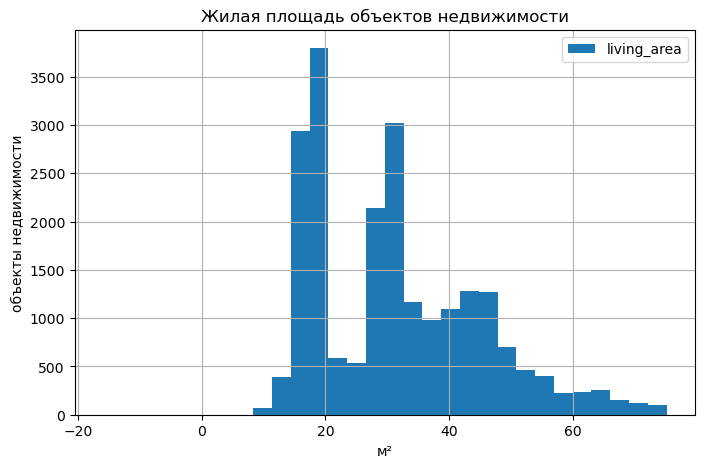

In [72]:
#так же рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['living_area'].quantile(.25) # первый квартиль q1
q3 = df['living_area'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr

#строю гистограмму площади
df['living_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенный вариант - около 17 м². Жилая площадь объектов более 50 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м². График также выглядит растянутым из-за редких, но больших значений.

**Площадь кухни - kitchen_area**

In [73]:
#описательная часть
df['kitchen_area'].describe()

count    22057.000000
mean         9.928984
std          4.214695
min          4.000000
25%          7.100000
50%          9.000000
75%         11.000000
max         40.000000
Name: kitchen_area, dtype: float64

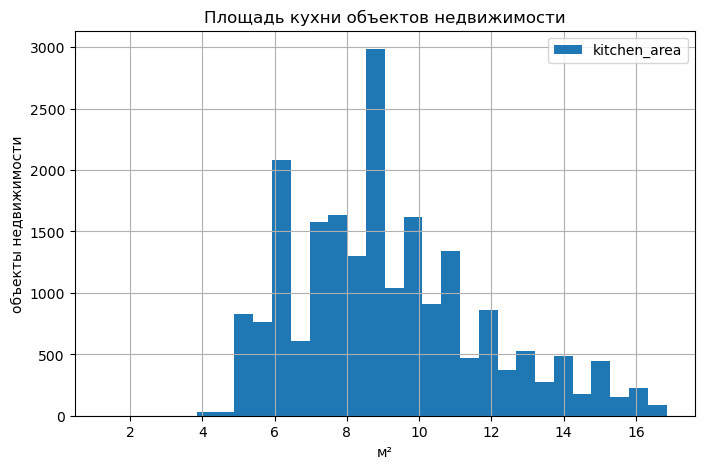

In [74]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['kitchen_area'].quantile(.25) # первый квартиль q1
q3 = df['kitchen_area'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr

#строю гистограмму площади кухни
df['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 м². Самый распространенный вариант - около 10 м². Площадь кухни более 13 м² встречается редко. Площадь кухни менее 5 м² также редкость. Среднее значение - 10,4 м², медиана 9 м². График также выглядит растянутым из-за редких, но больших значений.

**Цена объекта - last_price**

In [75]:
#описательная часть
df['last_price'].describe()

count    2.205700e+04
mean     5.555004e+06
std      4.633073e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.540000e+06
75%      6.400000e+06
max      2.892384e+08
Name: last_price, dtype: float64

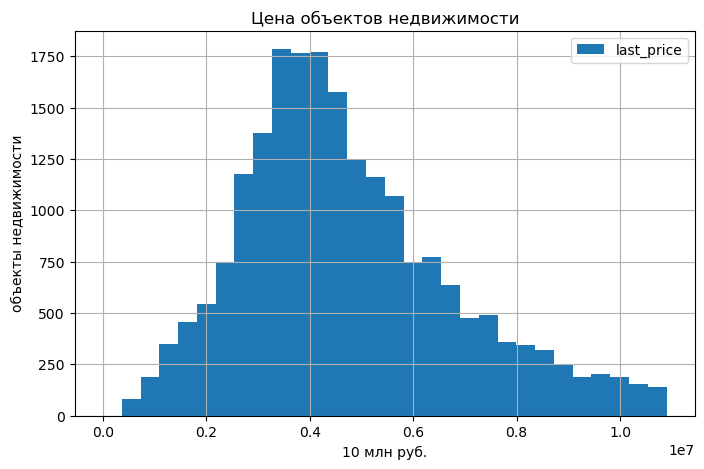

In [76]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['last_price'].quantile(.25) # первый квартиль q1
q3 = df['last_price'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr

#строю гистограмму цены объектов
df['last_price'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Цена объектов недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб. Самый распространенный вариант - около 3.5 млн.руб. Вариантов с ценой более 8 млн немного. Среднее значение - 6,4 млн, медиана 4,6 млн. График также выглядит растянутым из-за редких, но больших значений.

**Количество комнат - rooms**

In [77]:
#описательная часть
df['rooms'].describe()

count    22057.000000
mean         1.988439
std          0.899866
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

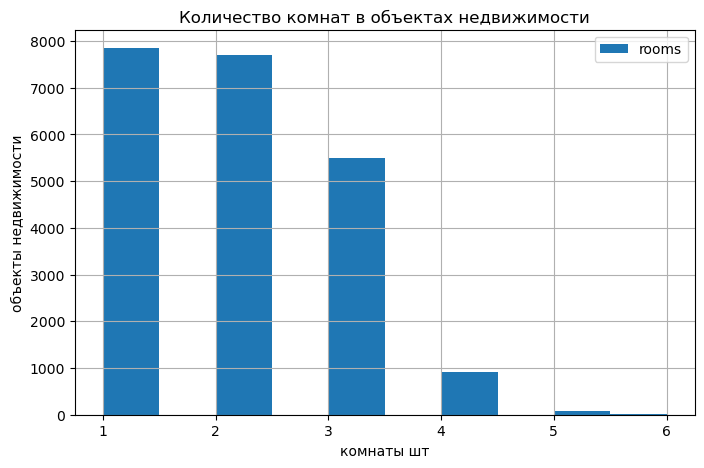

In [78]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['rooms'].quantile(.25) # первый квартиль q1
q3 = df['rooms'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr

#строю гистограмму количества комнат
df['rooms'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Количество комнат в объектах недвижимости')
plt.xlabel('комнаты шт')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с количеством комнат 4 относительно немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения 5-6 комнат не оказывают существенного влияния на среднее значение.

**Высота потолков - ceiling_height**

In [79]:
#описательная часть
df['ceiling_height'].describe()

count    22057.000000
mean         2.684157
std          0.183333
min          2.300000
25%          2.550000
50%          2.650000
75%          2.750000
max          3.500000
Name: ceiling_height, dtype: float64

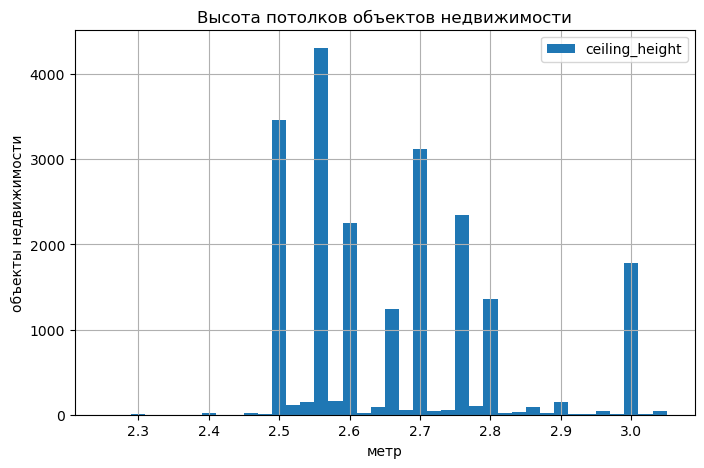

In [80]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['ceiling_height'].quantile(.25) # первый квартиль q1
q3 = df['ceiling_height'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr


#строю гистограмму высоты потолков
df['ceiling_height'].hist(bins=40, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метр')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости имеют высоту потолков 2,55 м. Реже представлены варианты от 2,75 м до 3 м. Среднее 2,68 м и медиана 2,65 точны.

**Этаж квартиры - floor**

In [81]:
#описательная часть
df['floor'].describe()

count    22057.000000
mean         5.905835
std          4.879800
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

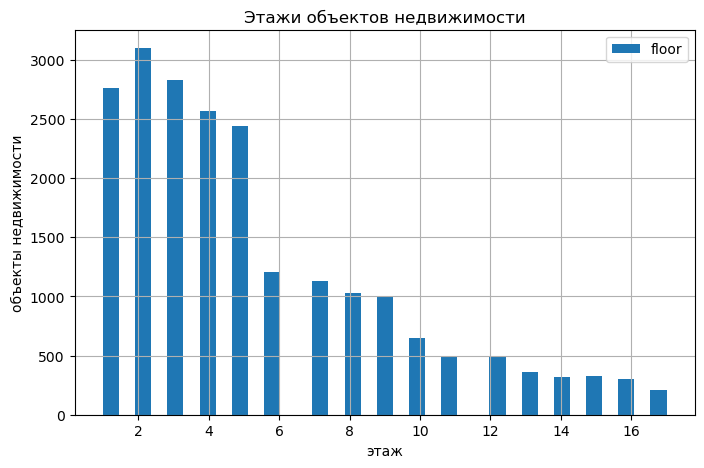

In [82]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['floor'].quantile(.25) # первый квартиль q1
q3 = df['floor'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr


#строю гистограмму этажей
df['floor'].hist(bins=35, range=(1, (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Этажи объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены с 1 по 5 этаж. Реже представлены варианты с 6 по 9. Среднее 6 этаж и медиана 4 этаж.

**Тип этажа квартиры: первый, последний, другой - type_floor**

In [83]:
#описательная часть
df['type_floor'].describe()

count      22057
unique         3
top       другой
freq       16246
Name: type_floor, dtype: object

In [84]:
#количество в каждой категории
df['type_floor'].value_counts()

другой       16246
последний     3050
первый        2761
Name: type_floor, dtype: int64

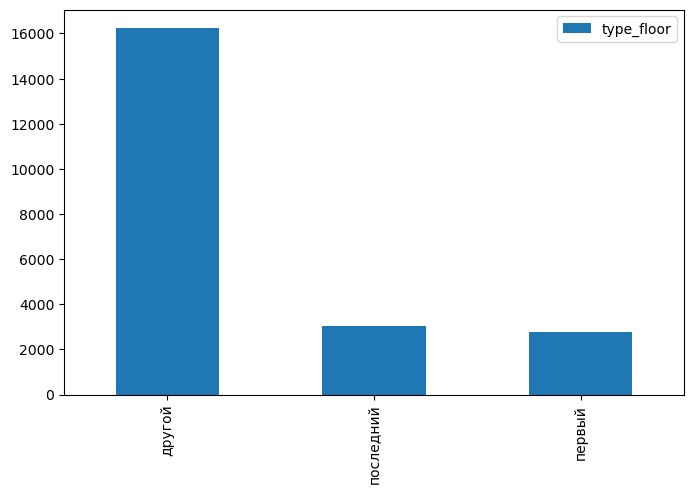

In [85]:
#рассмотрим для наглядности на графике
df['type_floor'].value_counts().plot.bar(figsize=(8, 5), legend=True)
plt.show()

Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.

**Общее количество этажей в доме - floors_total**

In [86]:
#описательная часть
df['floors_total'].describe()

count    22057.000000
mean        10.773405
std          6.582446
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

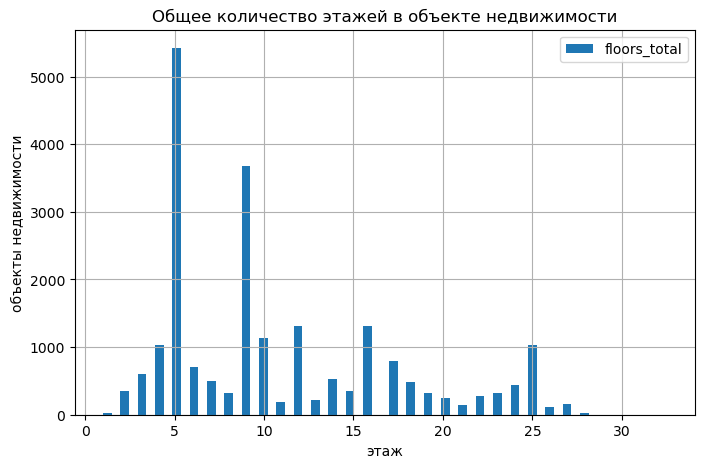

In [87]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['floors_total'].quantile(.25) # первый квартиль q1
q3 = df['floors_total'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr


#строю гистограмму общего количества этажей
df['floors_total'].hist(bins=65, range=(1, (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Общее количество этажей в объекте недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.

**Расстояние до центра города в метрах - city_centers_nearest**

In [88]:
#описательная часть
df['city_centers_nearest'].describe()

count    16786.000000
mean     14624.984422
std       8503.520410
min        287.000000
25%      10087.000000
50%      13313.000000
75%      16469.250000
max      65952.000000
Name: city_centers_nearest, dtype: float64

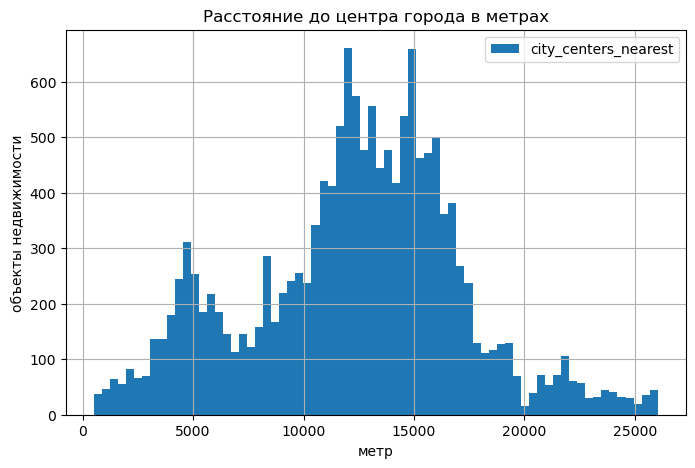

In [89]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['city_centers_nearest'].quantile(.25) # первый квартиль q1
q3 = df['city_centers_nearest'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr


#строю гистограмму расстояния до центра города
df['city_centers_nearest'].hist(bins=70, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('метр')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены на удалении 12-16 км от центра. Остальные варианты представлены реже. Среднее 14 км и медиана 13 км.

**Расстояние до ближайшего аэропорта - airports_nearest**

In [90]:
#убираю значения равные 0
df = df.query('airports_nearest != 0')

In [91]:
#описательная часть
df['airports_nearest'].describe()

count    16706.000000
mean     28962.845924
std      12834.950468
min       6450.000000
25%      18319.500000
50%      27231.500000
75%      37498.750000
max      84853.000000
Name: airports_nearest, dtype: float64

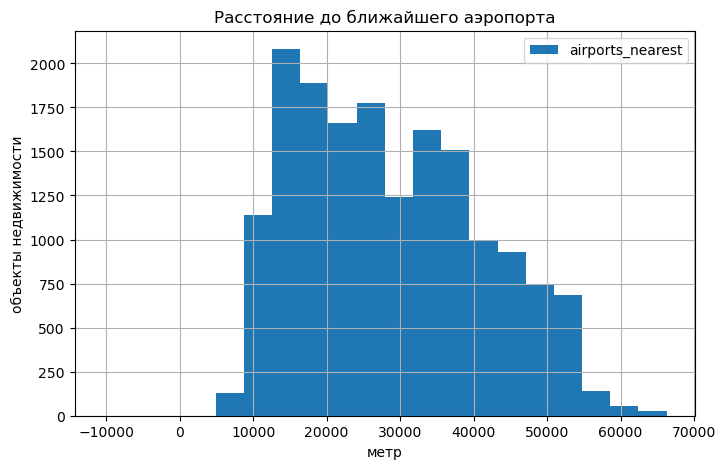

In [92]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['airports_nearest'].quantile(.25) # первый квартиль q1
q3 = df['airports_nearest'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr


#строю гистограмму расстояния до ближайшего аэропорта
df['airports_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('метр')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-27 км. Ближайший к аэропорту объект на расстоянии 6,5 км. Среднее 28,8 км и медиана 26,9 км.

**Расстояние до ближайшего парка - parks_nearest**

In [93]:
#описательная часть
df['parks_nearest'].describe()

count    7230.000000
mean      494.419087
std       342.836603
min         1.000000
25%       289.000000
50%       457.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

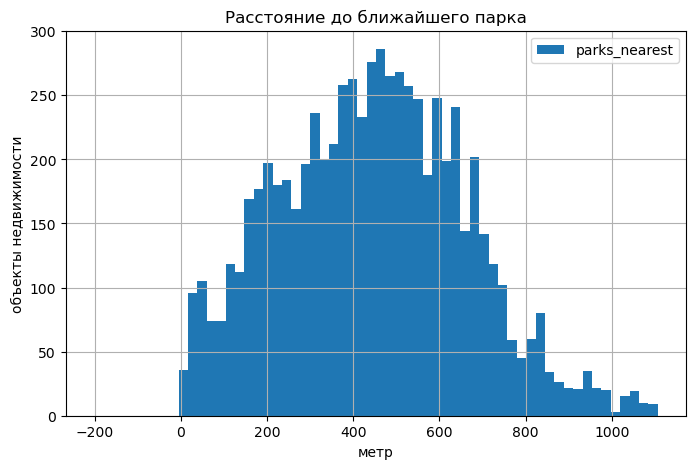

In [94]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['parks_nearest'].quantile(.25) # первый квартиль q1
q3 = df['parks_nearest'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr


#строю гистограмму расстояния до ближайшего парка
df['parks_nearest'].hist(bins=60, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('метр')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600 м. Среднее 490 м и медиана 455 м.

**День публикации объявления - week_publication**

In [95]:
#описательная часть
df['week_publication'].describe()

count    22056.000000
mean         2.571092
std          1.793418
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_publication, dtype: float64

In [96]:
#количество публикаций по каждому дню недели
df['week_publication'].value_counts().sort_values()

6    1586
5    1828
0    3368
2    3679
4    3745
1    3918
3    3932
Name: week_publication, dtype: int64

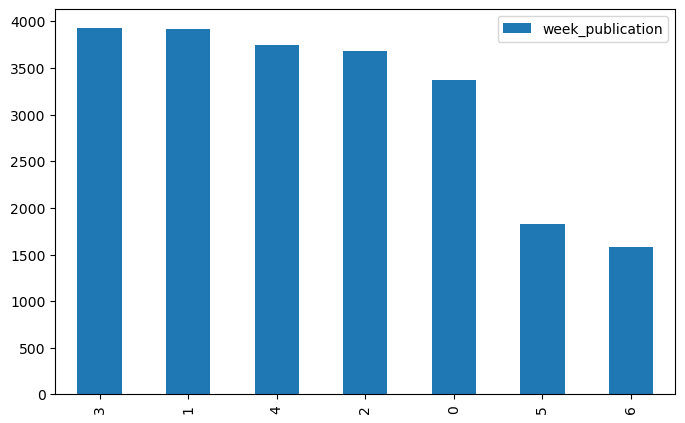

In [97]:
#построим график
df['week_publication'].value_counts().plot.bar(figsize=(8, 5), legend=True)
plt.show()

Видим, что чаще всего объявления публиковали в будние дни в середине недели (вторник и четверг). Реже в выходные дни.

**Месяц публикации объявления - month_publication**

In [98]:
#описательная часть
df['month_publication'].describe()

count    22056.00000
mean         6.39835
std          3.48796
min          1.00000
25%          3.00000
50%          6.00000
75%         10.00000
max         12.00000
Name: month_publication, dtype: float64

In [99]:
#количество публикаций в каждом месяце
df['month_publication'].value_counts().sort_values()

5     1169
1     1390
12    1511
7     1559
8     1647
6     1659
9     1834
10    2002
11    2196
4     2229
3     2394
2     2466
Name: month_publication, dtype: int64

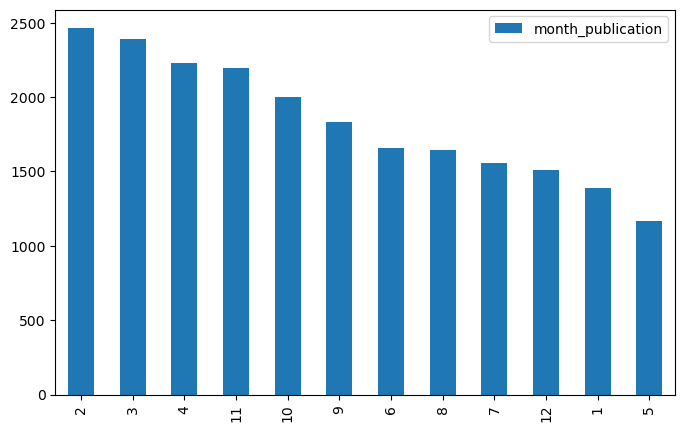

In [100]:
#построим график
df['month_publication'].value_counts().plot.bar(figsize=(8, 5), legend=True)
plt.show()

Видим, что чаще всего объявления публиковали в марте и феврале. Наименьшие показатели в мае и январе. Можно предположить, что это из-за большого кол-ва выходных и праздничных дней. Высокие продажи в феврале-марте можно объяснить следующими причинами: 

1. Февраль. После Нового года предложение превышает спрос, поскольку у многих продавцов успели накопиться долги за прошлый год. 

2. Март. В начале весны рынок активизируется: покупают довольно много квартир «под ремонт».

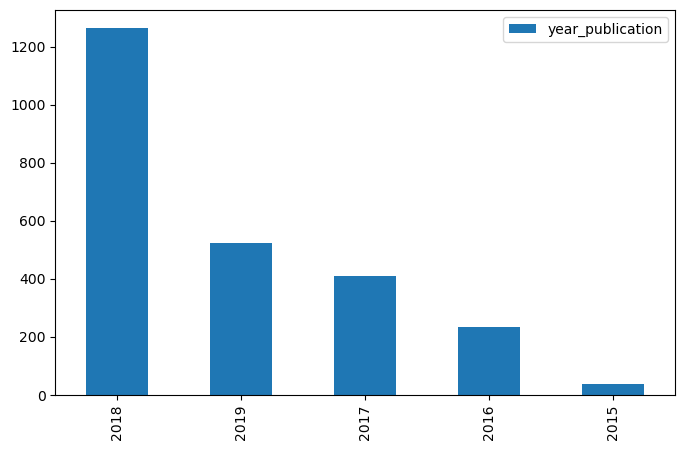

In [101]:
df_feb=df.loc[df['month_publication']==2]
#строим график даты публикации объявления в феврале каждого года
df_feb['year_publication'].value_counts().plot.bar(figsize=(8, 5), legend=True)
plt.show()

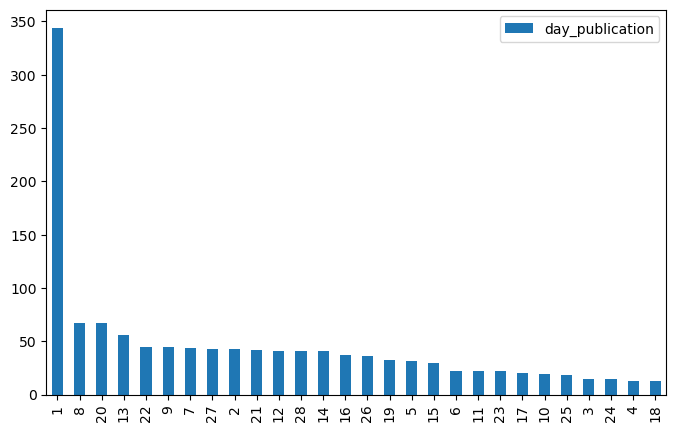

In [102]:
#выделяем таблицу только с февралем 2018 года
df_feb_2018=df_feb.loc[df_feb['year_publication']==2018]
#добавляю столбец с днем публикации объявления для таблицы с выделенным февралем
df_feb_2018['day_publication'] = df_feb_2018['first_day_exposition'].dt.day
#строим график дня публикации в феврале 2018 года
df_feb_2018['day_publication'].value_counts().plot.bar(figsize=(8, 5), legend=True)
plt.show()

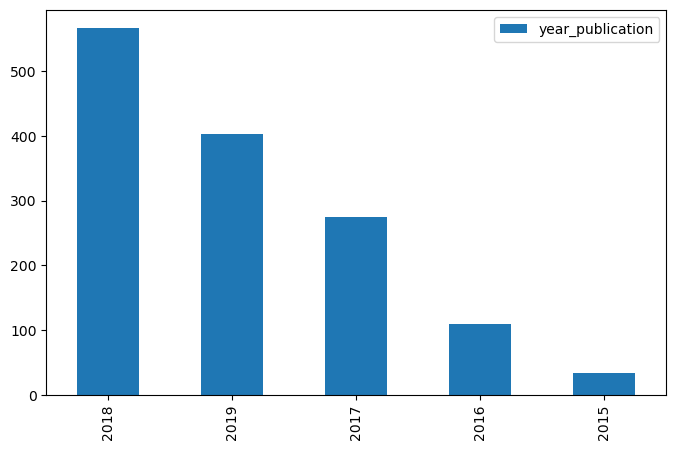

In [103]:
df_jan=df.loc[df['month_publication']==1]
#строим график даты публикации объявления в январе каждого года
df_jan['year_publication'].value_counts().plot.bar(figsize=(8, 5), legend=True)
plt.show()

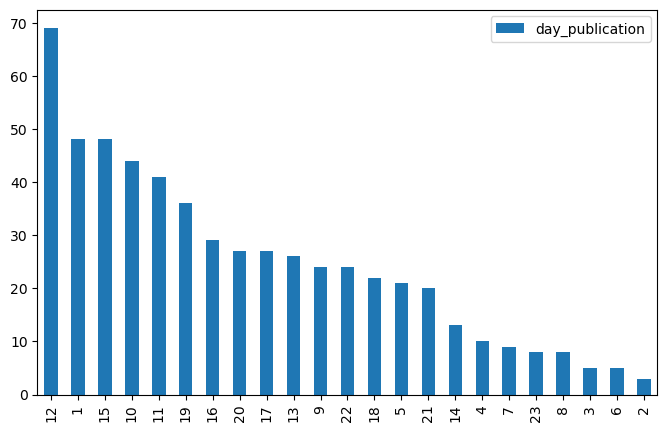

In [104]:
#выделяем таблицу только с январем 2018 года
df_jan_2018=df_jan.loc[df_jan['year_publication']==2018]
#добавляю столбец с днем публикации объявления для таблицы с выделенным январем
df_jan_2018['day_publication'] = df_jan_2018['first_day_exposition'].dt.day
#строим график дня публикации в январе 2018 года
df_jan_2018['day_publication'].value_counts().plot.bar(figsize=(8, 5), legend=True)
plt.show()

Исследовав подробнее самый популярный месяц по публикации мы выявили, что большой скачок был в 2018 году. 1 февраля 2018 года было опубликовано около 350 объявлений, в январе такой закономерности не наблюдается, хотя так же именно в 2018 году зафиксированно больше публикаций чем в другие года. 

#### **Промежуточный вывод: Можно сказать что мы определили как выглядит типичный объект недвижимости из исходных данных:**
**Однокомнатные или двухкомнатные квартиры общей площадью около 45 кв.м., с кухней 10 кв.м., высотой потолков 2,55 м, находящиеся в пятиэтажке или девятиэтажке между 1 и 5 этажами, расположенные на расстоянии от центра  13-16 км, от аэропорта на расстоянии 15-27 км, до ближайшего парка 400-600 метров.**


### Изучим как быстро продавались квартиры

**Для начала проанализируем время продажи квартиры с помощью столбца days_exposition - этот параметр показывает, сколько дней было размещено каждое объявление.**

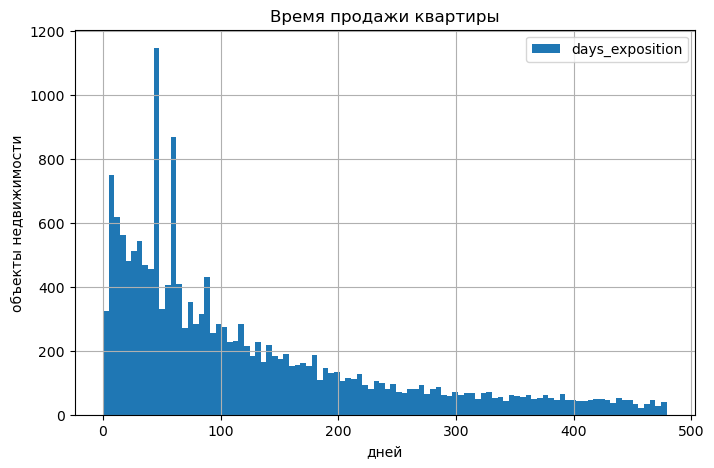

In [105]:
#рассчитываю q1, q3 и iqr чтобы построить график без выбросов
q1 = df['days_exposition'].quantile(.25) # первый квартиль q1
q3 = df['days_exposition'].quantile(.75) # третий квартиль q3
iqr = q3 - q1 # межквартильный размах iqr


#строю гистограмму времени продажи квартиры
df['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(8, 5), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.ylabel('объекты недвижимости')
plt.show()

На графике видны несколько больших значений до 100 дней, но при таком длинном "хвосте" из данных делать выводы не уместно. Думаю можно ограничить гистограмму периодом до 100 дней.

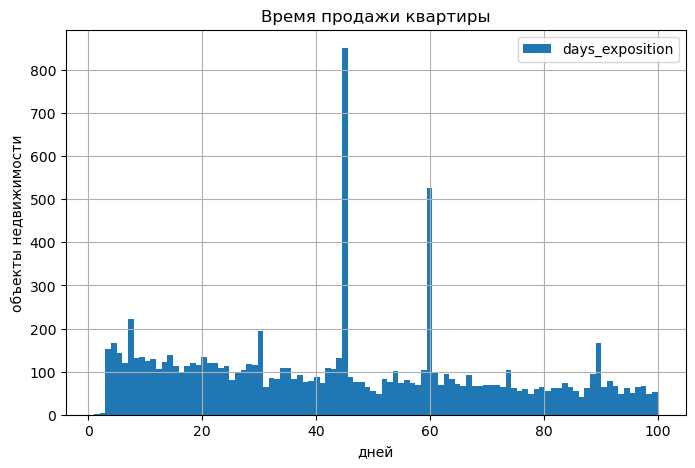

In [106]:
#строю гистограмму времени продажи квартиры
df['days_exposition'].hist(bins=100, range=(1, 100), figsize=(8, 5), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.ylabel('объекты недвижимости')
plt.show()

Видим, что чаще всего квартиры продают за 45 и 60 дней.
Но нельзя быть точно уверенным, что этот показатель говорит именно о продаже квартиры, ведь объявление могло просто автоматически закрыться из-за истекшего срока.

Как мы уже отмечали на этапе предобработки по правилам Яндекс.Недвижимости объявления автоматически снимаются с публикции как раз на 45й и 60й день, в зависимости от типа. Поэтому выбросы логичны.

**Для того чтобы рассмотреть среднее и медиану столбца days_exposition выведем на экран описательную статистику.**

In [107]:
#описательная часть
df['days_exposition'].describe()

count    19159.000000
mean       166.818936
std        189.750912
min          1.000000
25%         44.000000
50%         92.000000
75%        218.000000
max       1048.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 182 дня, медианное - 92 дня. Максимальное значение - 972 дней.
Стандартное отклонение превышает среднее значение - это говорит о большом количестве выбросов.

In [108]:
df['days_exposition'].value_counts()

45.0      851
60.0      527
7.0       223
30.0      195
90.0      167
         ... 
850.0       1
790.0       1
866.0       1
1011.0      1
971.0       1
Name: days_exposition, Length: 958, dtype: int64

In [109]:
#убираю выбросы 45 и 60 дней
#df_new = df.query('(days_exposition != 45) & (days_exposition != 60)' )
df_new = df.loc[(df['days_exposition'] != 45.00000000000001) & (df['days_exposition'] != 60)]
#проверим длину датафрейма
len(df_new)

20678

In [110]:
df_new['days_exposition'].value_counts()

7.0       223
30.0      195
4.0       167
90.0      167
3.0       152
         ... 
1037.0      1
734.0       1
822.0       1
795.0       1
971.0       1
Name: days_exposition, Length: 956, dtype: int64

In [111]:
df_new['days_exposition'].describe()

count    17781.000000
mean       175.815140
std        194.078631
min          1.000000
25%         41.000000
50%        104.000000
75%        235.000000
max       1048.000000
Name: days_exposition, dtype: float64

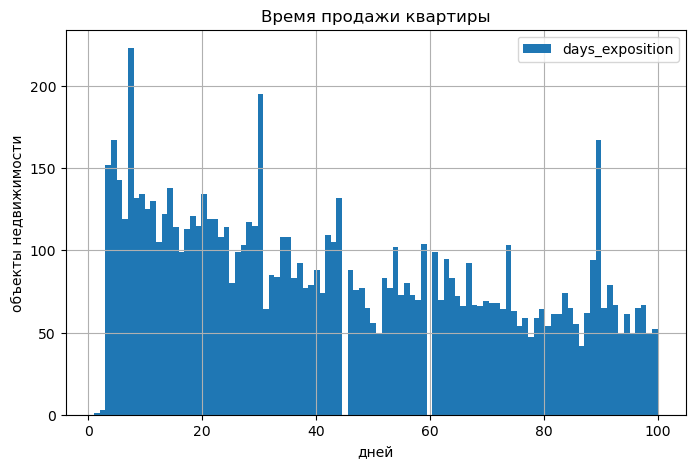

In [112]:
#строю гистограмму времени продажи квартиры без выбросов
df_new['days_exposition'].hist(bins=100, range=(1, 100), figsize=(8, 5), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.ylabel('объекты недвижимости')
plt.show()

Временно убрав из выборки явные выбросы в 45 и 60 дней, мы видим что чаще всего объекты недвижимости продавались в срок 9 и 30 дней, что вполне логично. 

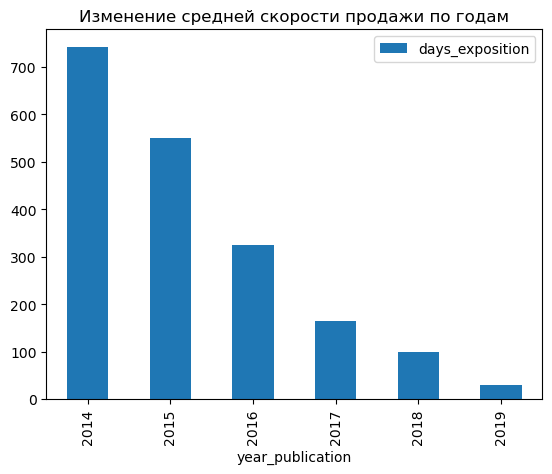

,days_exposition
year_publication,
2014,742.0
2015,550.0
2016,325.0
2017,164.0
2018,99.0
2019,29.0


In [113]:
#сводная таблица
pivot_table_year = df_new.pivot_table(index ='year_publication', values='days_exposition').round()
#строю график зависимости по медианному значению
pivot_table_year.plot(kind='bar', title='Изменение средней скорости продажи по годам', legend=True)
plt.show() #выводим график
pivot_table_year #выводим таблицу

Мы видим что с каждым годом скорость продажи значительно растет. Так в 2014 году недвижимость продавалась в среднем за 700 дней (что аномально много), а в 2019 году средний показатель 30 дней. Думаю это связано с тем, что в 2014 году пользователи еще не активно пользовались сервисом яндекс.недвижимость и попросту забывали о том что у них висят объявления, и возможно правила публикации (удаления через 45-60 дней) еще не работали. 

### Изучение факторов, которые больше всего влияют на общую (полную) стоимость объекта

**Изучим зависит ли цена от:**

- общей площади;

- жилой площади;

- площади кухни;

- количества комнат;

- этажа, на котором расположена квартира (первый, последний, другой);

- даты размещения (день недели, месяц, год)

In [114]:
#создадим список с необходимыми столбцами (факторами) для проверки
list_factors = df[['last_price',
                      'total_area',
                      'living_area',
                      'kitchen_area',
                      'rooms',
                       'type_floor',
                      ]]


In [115]:
#создадим матрицу корреляции
list_factors.corr()


,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.654286,0.490124,0.471300,0.351748
total_area,0.654286,1.000000,0.885252,0.514677,0.768969
living_area,0.490124,0.885252,1.000000,0.252234,0.896069
kitchen_area,0.471300,0.514677,0.252234,1.000000,0.131238
rooms,0.351748,0.768969,0.896069,0.131238,1.000000


**Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. Положительная линейная связь отмечается также между стоимостью квартиры и ,площадью кухни, жилой площадью и количеством комнат. Это логично, ведь чем количество комнат или площадь комнат/кухни больше, тем больше стоимость квартиры.** 

Столбец с типом этажа не отобразился, так как не имеет числовое значение, его мы рассмотрим отдельно.

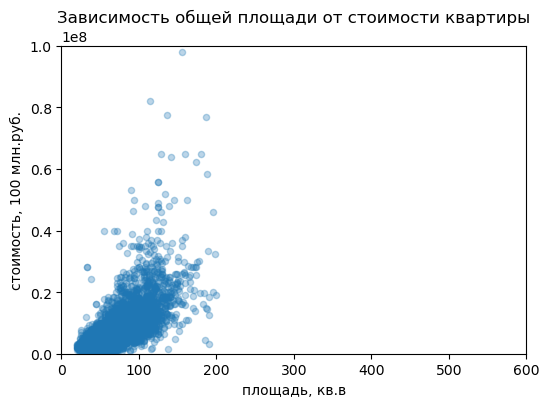

In [116]:
#использую график типа scatter для определения зависимости стоимости квартиры от общей площади 
plot_total_area=df.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(6, 4), legend=True, alpha = 0.3) 
plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, кв.в')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.xlim(0, 600)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью от 40 до 150 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена.

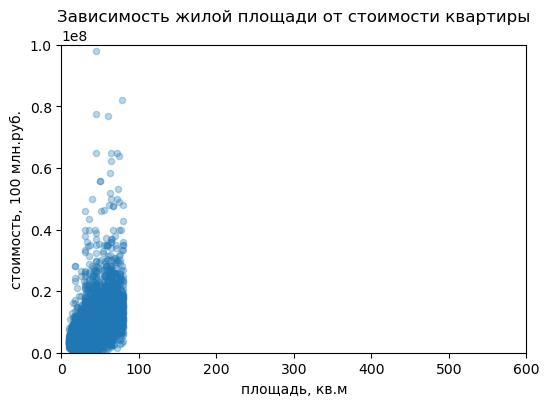

In [117]:
#использую график типа scatter для определения зависимости стоимости квартиры от жилой площади 
plot_total_area=df.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(6, 4), legend=True, alpha = 0.3) 
plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, кв.м')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.xlim(0, 600)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и жилой площадью до 75 м². Зависимость прямопропорциональная - чем больше жилаяплощадь квартиры, тем выше ее стоимость.

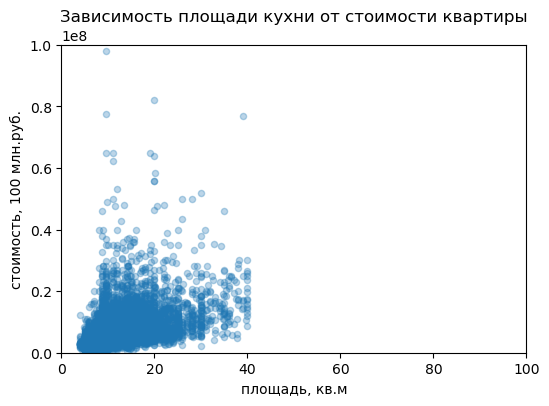

In [118]:
#использую график типа scatter для определения зависимости стоимости квартиры от площади кухни
plot_total_area=df.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(6, 4), legend=True, alpha = 0.3) 
plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, кв.м')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.xlim(0, 100)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 25 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.

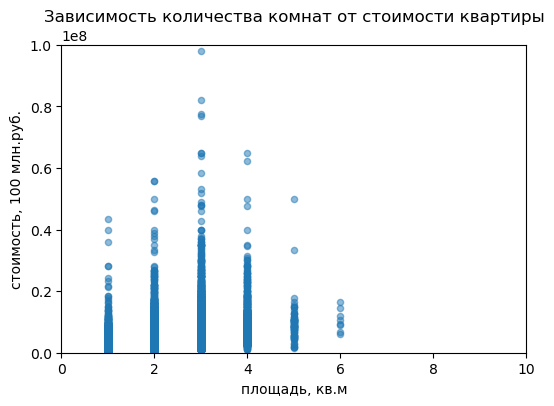

In [119]:
#использую график типа scatter для определения зависимости стоимости квартиры от количества комнат
plot_total_area=df.plot(x='rooms', y ='last_price', kind ='scatter', figsize=(6, 4), legend=True, alpha = 0.5) 
plt.title('Зависимость количества комнат от стоимости квартиры')
plt.xlabel('площадь, кв.м')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.xlim(0, 10)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 30 млн. руб и кол-вом комнат от 1 до 4. Можно заметить, что с увеличением числа комнат до 3 комнат стоимость квартир растет, от 3 до 5 - цена примерно одинаковая, для 6 комнат стоимость снижается. Это можно объяснить тем, что обычно 6-ти комнатные квартиры делают с маленькой площадью каждой комнаты.

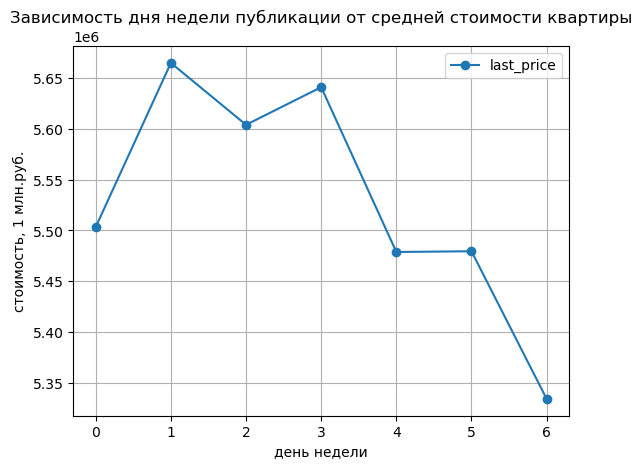

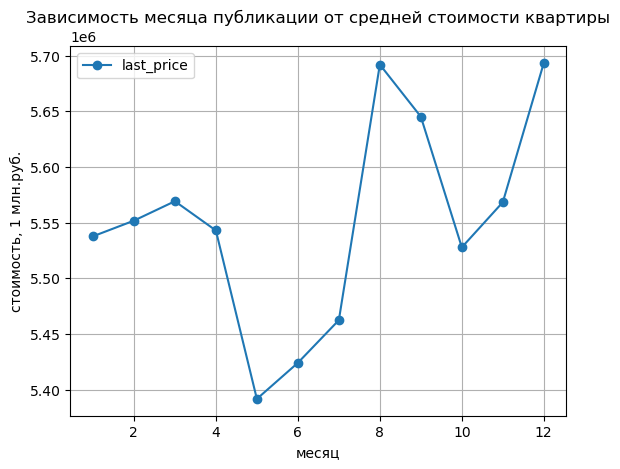

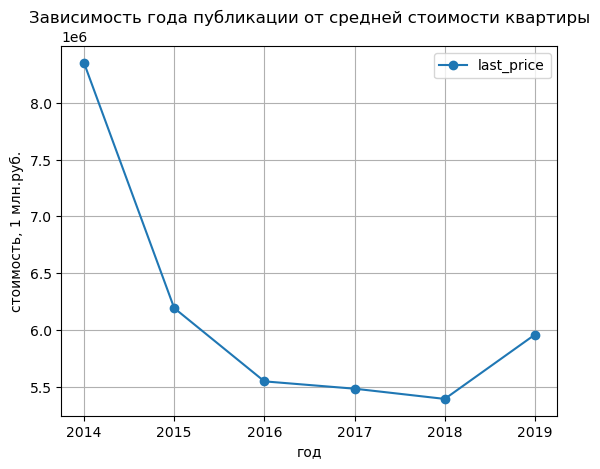

,last_price
year_publication,
2014,8351733.0
2015,6191774.0
2016,5546235.0
2017,5481664.0
2018,5391556.0
2019,5958231.0


In [120]:
#использую линейные графики для определения зависимости средней стоимости квартиры от дня недели/недели/месяца публикации

df.pivot_table(index ='week_publication', values='last_price').round()\
.plot(y = 'last_price', style='o-', grid=True)
plt.title('Зависимость дня недели публикации от средней стоимости квартиры')
plt.xlabel('день недели')
plt.ylabel('стоимость, 1 млн.руб.')
plt.show()

df.pivot_table(index ='month_publication', values='last_price').round()\
.plot(y = 'last_price', style='o-', grid=True)
plt.title('Зависимость месяца публикации от средней стоимости квартиры')
plt.xlabel('месяц')
plt.ylabel('стоимость, 1 млн.руб.')
plt.show()

df.pivot_table(index ='year_publication', values='last_price').round()\
.plot(y = 'last_price', style='o-', grid=True)
plt.title('Зависимость года публикации от средней стоимости квартиры')
plt.xlabel('год')
plt.ylabel('стоимость, 1 млн.руб.')
plt.show()

df.pivot_table(index ='year_publication', values='last_price').round()

Из графиков видно что ни день недели, ни месяц публикации особо не влияет на стоимость квартиры. Есть тенденция что в будние дни квартиры выкладывают по чуть более высоким ценам чем в выходные. В мае квартиры дешевле, чем в августе. Но это всё не большой разброс - в пределах 200-300 тысяч, для общей стоимости недвижимости это не большой показатель.

Рассмотрим по подробнее как меняются другие показатели недвижимости с годами.

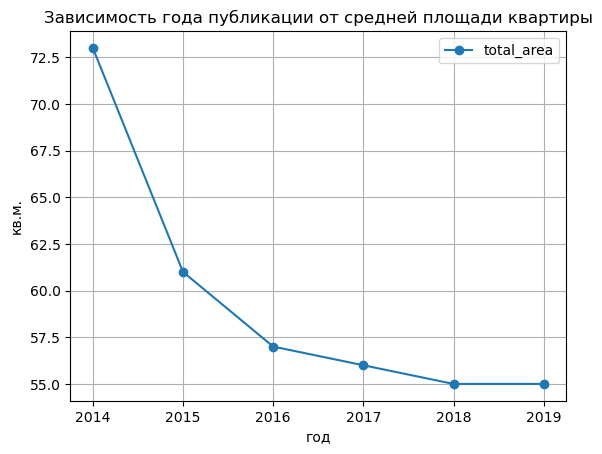

,total_area
year_publication,
2014,73.0
2015,61.0
2016,57.0
2017,56.0
2018,55.0
2019,55.0


In [121]:
df.pivot_table(index ='year_publication', values='total_area').round()\
.plot(y = 'total_area', style='o-', grid=True)
plt.title('Зависимость года публикации от средней площади квартиры')
plt.xlabel('год')
plt.ylabel('кв.м.')
plt.show()

df.pivot_table(index ='year_publication', values='total_area').round()

Интересно, что мы видим похожу картину, площадь продаваемых квартир так же уменьшается с каждым годом. Теперь понятно почему 2014 год так отличаетеся по ценам от других годов.

Но проверим еще один показатель - колличество объявлений по годам.

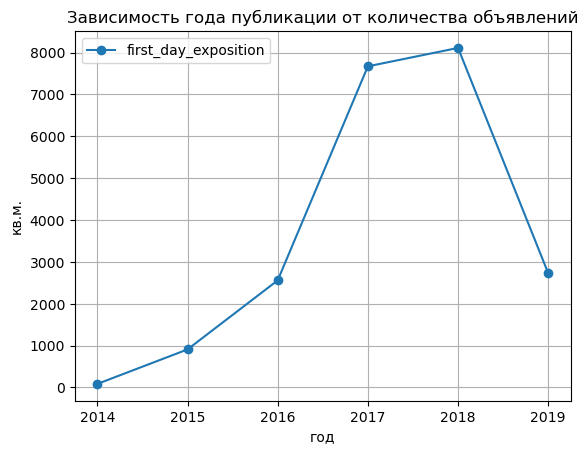

,first_day_exposition
year_publication,
2014,83
2015,907
2016,2557
2017,7671
2018,8111
2019,2727


In [122]:
df.pivot_table(index ='year_publication', values='first_day_exposition', aggfunc='count').round()\
.plot(y = 'first_day_exposition', style='o-', grid=True)
plt.title('Зависимость года публикации от количества объявлений')
plt.xlabel('год')
plt.ylabel('кв.м.')
plt.show()

df.pivot_table(index ='year_publication', values='first_day_exposition', aggfunc='count').round()

**По результатам дополнительного исследования мы видим, что высокие цены на квартиры в 2014 году обусловлены тем что средняя площадь продаваемых квартиры выше чем в другие года, и колличество объявлений значительно меньше, поэтому мы и могли у видеть на первом графике такой резкий скачок. 
2017 и 2018 год стали рекордными по колличеству объявлений, но на стоимость квартир это никак не повлияло, только с 2019 года цены на квартиры стали расти.** 

Для того чтобы проверить связь между типом этажа и стоимостью квартиры построю сводную таблицу и по ней построю график с результатами для визуализации.

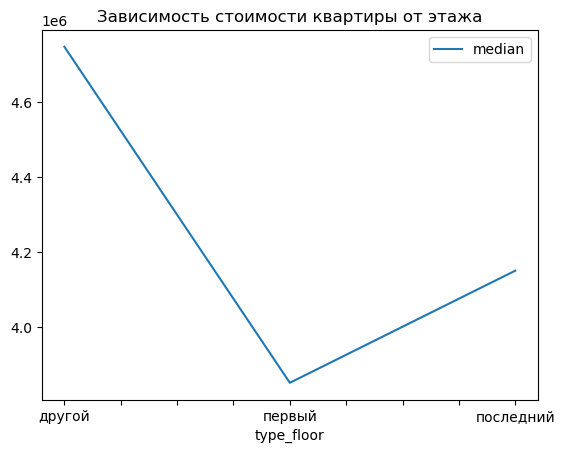

,mean,count,median
type_floor,,,
другой,5.824591e+06,16245,4749000
первый,4.369065e+06,2761,3850000
последний,5.192213e+06,3050,4150000


In [123]:
#сводная таблица
pivot_table_type_floor = df.pivot_table(index ='type_floor', values='last_price', aggfunc=['mean','count','median'])
#переименую столбцы
pivot_table_type_floor.columns = ['mean', 'count', 'median']
#строю график зависимости по медианному значению
pivot_table_type_floor.plot(y='median', title='Зависимость стоимости квартиры от этажа', legend=True)
plt.show() #выводим график
pivot_table_type_floor #выводим таблицу

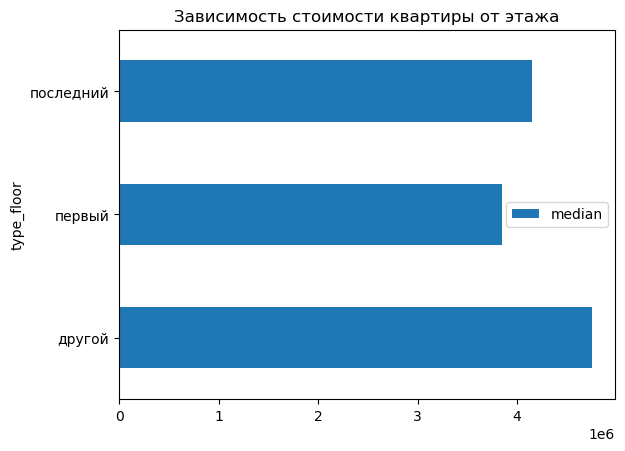

In [124]:
#строю график зависимости по медианному значению
pivot_table_type_floor.plot(kind='barh', y='median', title='Зависимость стоимости квартиры от этажа', legend=True)
plt.show() #выводим график

Прослеживается, что стоимость квартиры на первом и последнем этажах меньше, чем на других. 

#### **Промежуточный вывод:**
**На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь как в целом так и отдельно жилой/кухни или количества комнат, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. с 2019 года цены на недвижимость стали расти.**

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

In [125]:
#Для начала определим 10 населенных пунктов с наибольшим числом объявлений
top_10_locality_name = df['locality_name'].value_counts().head(10)
top_10_locality_name

Санкт-Петербург      14390
посёлок Мурино         520
Кудрово                440
посёлок Шушары         429
Всеволожск             387
Пушкин                 344
Колпино                333
посёлок Парголово      320
Гатчина                305
Выборг                 227
Name: locality_name, dtype: int64

In [126]:
#посчитаем среднюю цену за кв м по топ 10 населенным пунктам с помощью сводной таблицы и среза данных через query
top_10_locality_name_pivot = df.query('locality_name in @top_10_locality_name.index')\
.pivot_table(index='locality_name', values='price_square_meter')
top_10_locality_name_pivot.sort_values(by='price_square_meter', ascending=False).round()

,price_square_meter
locality_name,
Санкт-Петербург,111346.0
Пушкин,102414.0
Кудрово,95061.0
посёлок Парголово,90345.0
посёлок Мурино,84974.0
посёлок Шушары,78185.0
Колпино,75340.0
Гатчина,68852.0
Всеволожск,68600.0


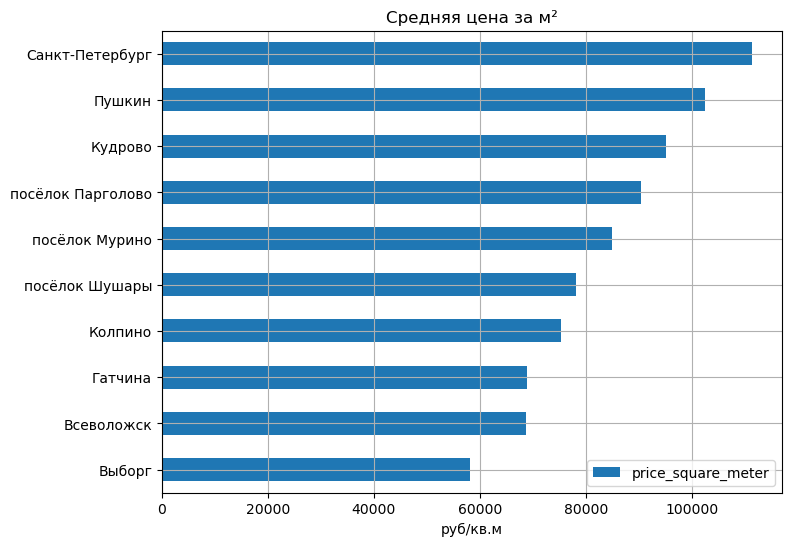

In [127]:
#покажем цену квадратного метра в топ 10 населенных пунктах на столбчатой диаграмме

top_10_locality_name_pivot.sort_values(by='price_square_meter').plot(kind='barh', legend=True, grid=True, figsize=(8, 6))
plt.title('Средняя цена за м²')
plt.xlabel('руб/кв.м')
plt.ylabel('')
plt.show()

#### **Промежуточный вывод:**
**Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111317 руб.), что логично. Следом по стоимости идет Пушкин(101001 руб.). Наименьшая цена за квадратный метр в Выборге(58175 руб.). Результат логичен, так как например Пушкин находится ближе к Питеру и рядом много достопримечательностей, а Выбор отдален от Питера на 121 км**

### Средняя цена каждого километра и зависимость стоимости квартир от расстояния до центра города в километрах по Санкт-Петербургу

In [128]:
#выделим квартиры в Санкт-Петербурге
df_spb = df.query('locality_name == "Санкт-Петербург"')
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_publication,month_publication,year_publication,type_floor,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.60,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
7,5,7915000,71.6,2019-04-18,2,2.75,24,30.5,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


In [129]:
#посчитаем сколько всего объявление в Санкт-Петербурге
len(df_spb)

14390

Определим зависимость общей цены квартиры от расстояния до центра  в километрах

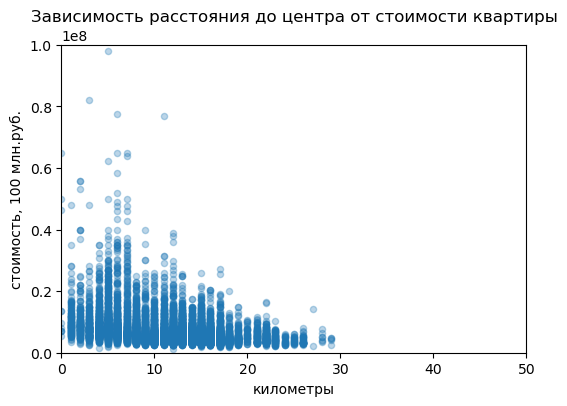

In [130]:
#использую график типа scatter для определения зависимости стоимости квартиры от расстояния до центра города в километрах
plot_total_area=df_spb.plot(x='city_centers_nearest_km', y ='last_price', kind ='scatter', figsize=(6, 4), legend=True, alpha = 0.3) 
plt.title('Зависимость расстояния до центра от стоимости квартиры')
plt.xlabel('километры')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.xlim(0, 50)
plt.show()

На графике видно, что чем дальше квартира от центра, тем меньше стоимость.

In [131]:
#вычислим среднюю стоимость каждого километра от центра города
df_spb_pivot=df_spb.pivot_table(index='city_centers_nearest_km', values='price_square_meter').round(2)
df_spb_pivot

,price_square_meter
city_centers_nearest_km,
0.0,220763.51
1.0,154433.18
2.0,146383.37
3.0,121121.63
4.0,127652.55
5.0,136346.20
6.0,141107.92
7.0,140076.52
8.0,121960.25


Построим график и с помощью стоимости квадратного метра определим центр города. Та точка, после которой пойдет явный спад в стоимости и будем считаться границей центра города.

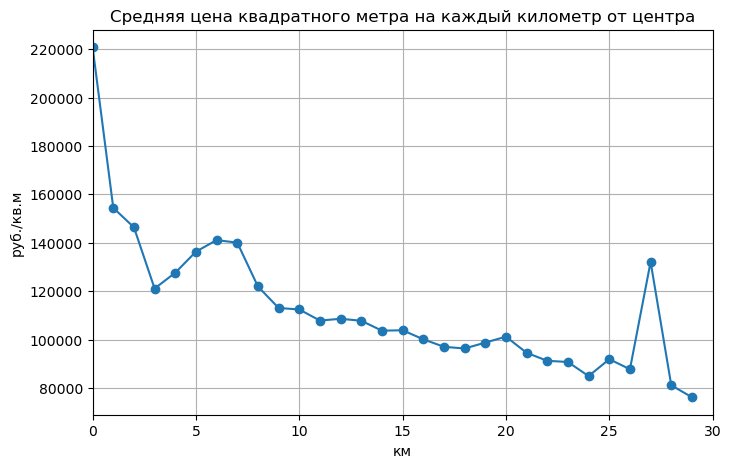

In [132]:
df_spb_pivot.plot(marker='o', grid=True, figsize=(8, 5), legend=False)
plt.title('Средняя цена квадратного метра на каждый километр от центра')
plt.xlabel('км')
plt.ylabel('руб./кв.м')
plt.xlim(0, 30)
plt.show()

**Видим, что после 9-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за загородных элитных районов.**

In [133]:
#вычислим среднюю стоимость квартиры от расстояния до центра города
df_spb_pivot_lp=df_spb.pivot_table(index='city_centers_nearest_km', values='last_price').round(2)
df_spb_pivot_lp

,last_price
city_centers_nearest_km,
0.0,21146733.82
1.0,13164728.88
2.0,11427783.92
3.0,9171737.70
4.0,9417051.15
5.0,10464570.09
6.0,10400461.34
7.0,10512176.40
8.0,7930836.26


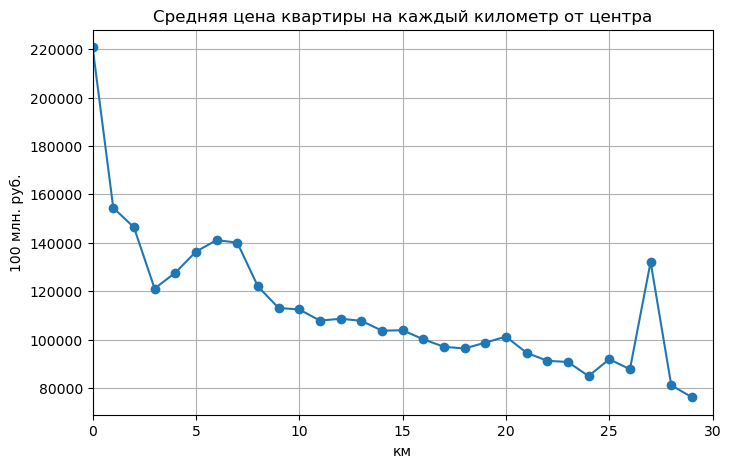

In [134]:
df_spb_pivot.plot(style='o-', grid=True, figsize=(8, 5), legend=False)
plt.title('Средняя цена квартиры на каждый километр от центра')
plt.xlabel('км')
plt.ylabel('100 млн. руб.')
plt.xlim(0, 30)
plt.show()

Видим, что после 9-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за загородных элитных районов, рассмотрим этот участок по подробнее. 

In [135]:
df_spb_elit = df_spb.loc[df_spb['city_centers_nearest_km']==27]
df_spb_elit

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_publication,month_publication,year_publication,type_floor,city_centers_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918.92,1,11,2017,другой,27.0
5961,6,2250000,32.0,2018-02-27,1,2.70,2,16.5,2,False,...,NaN,0.0,NaN,178.0,70312.50,1,2,2018,последний,27.0


Видим, что такой выброс на 27-м километре дал всего один объект с завышенной ценой. Посмотрим все его значения, чтобы определить причину такой стоимости.

In [136]:
df_spb_748=df_spb_elit.loc[748]
df_spb_748

total_images                                13
last_price                            14350000
total_area                                74.0
first_day_exposition       2017-11-28 00:00:00
rooms                                        2
ceiling_height                            3.13
floors_total                                 5
living_area                               30.0
floor                                        3
is_apartment                             False
studio                                   False
open_plan                                False
kitchen_area                              25.0
balcony                                      0
locality_name                  Санкт-Петербург
airports_nearest                       23888.0
city_centers_nearest                   27313.0
parks_around_3000                          1.0
parks_nearest                           1496.0
ponds_around_3000                          0.0
ponds_nearest                              NaN
days_expositi

Это большая двухкомнатная квартира с высокими потолками, находящаяся на 3-м этаже пятиэтажного дома. Вроде бы ничего примечательного, но изучив картографические данные города я узнала что на расстоянии 27 км. от центра находится самый премиальный район рядом с финскийм заливом и Лахта центром, скорее всего из за такого расположения и была завышена стоимость. 

А теперь посмотрим на количество квартир разных категорий (первый, последний, другой), которые продаются на 3-м км. и 5-ом и какую долю они занимают на каждом километре, чтобы изучить пик и провал в центре города

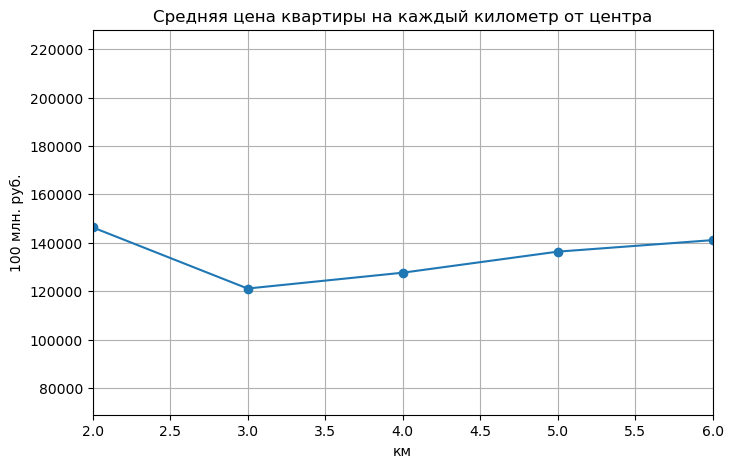

In [137]:
df_spb_pivot.plot(style='o-', grid=True, figsize=(8, 5), legend=False)
plt.title('Средняя цена квартиры на каждый километр от центра')
plt.xlabel('км')
plt.ylabel('100 млн. руб.')
plt.xlim(2, 6)
plt.show()

In [138]:
df_spb_3km = df_spb[df_spb['city_centers_nearest_km']==3]
df_spb_3km.pivot_table(index='type_floor', values='city_centers_nearest_km', aggfunc='count')

,city_centers_nearest_km
type_floor,
другой,152
первый,44
последний,60


In [139]:
df_spb_3km['type_floor'].value_counts(normalize=True).to_frame().round(2)

,type_floor
другой,0.59
последний,0.23
первый,0.17


In [140]:
df_spb_5km = df_spb[df_spb['city_centers_nearest_km']==5]
df_spb_5km.pivot_table(index='type_floor', values='city_centers_nearest_km', aggfunc='count')

,city_centers_nearest_km
type_floor,
другой,537
первый,70
последний,110


In [141]:
df_spb_5km['type_floor'].value_counts(normalize=True).to_frame().round(2)

,type_floor
другой,0.75
последний,0.15
первый,0.10


Рассмотрев подробнее 3 и 5 километр от центра мы видим что на 3-м километре 40% квартир находятся на первом и последнем этажах, а от этого как мы уже выяснили ранее зависит стоиомость квартиры (на первом этаже квартиры стоят дешевле)

**Вывод. В этом разделе мы определили границы центра города Санкт-Петербург - 9 км.
Выявили закономерность, что чем дальше объект недвижимости от центра городам, тем он дешевле. Кроме одного исключения на 3-м километре, там квартиры чуть дешевле, значительная часть квартир находится на 1-м и последнем этажах, что отрицательно влияет на стоимость квартиры.** 

## ИТОГИ 

## **Проделанная работа:**

Была получена первоначальная информация по датасету.

Привели название столбцов к одному виду.

Обнаружены пропуски в датасете. Количество столбцов с пропусками 14.

Явных дубликатов в датаесете не было обнаружено. 

Была проведена работа по заполнению пропусков, удаление ненужных строк из датасета. Аномалии и дубликаты обработаны.

Заменены неявные дубликаты (раньше названия населенных пунктов повторялись из-за разной записи е-ё и так далее).

Столбец с датой приведен к округленному до дней и правильному форматам. 

Пропуски в столбце с расстоянием до центра заменены медианным значением относительно населенных пунктов.

Пропуски в столбце с высотой потолков заменены на медиану.

Убраны пропуски в столбце living area и kitchen area.

Замена на булев тип данных в столбцах, где это необходимо. 

Удалены квартиры, которые продаются больше 1012 дней.

Удалены квартиры с количеством этажей этаже в доме больше 37

В датафрейм добавлены новые показатели

- цена одного квадратного метра;

- день недели публикации объявления;

- месяц публикации объявления;

- год публикации объявления;

- тип этажа квартиры («первый», «последний», «другой»);

- расстояние до центра города в километрах 

Сделаны графики соотношений цены к другим показателям квартир

Выявлен топ 10 населенных пунктов по количеству объявлений и средняя стоимость квартиры на каждом километре от центра


# **ОБЩИЙ ВЫВОД ИССЛЕДОВАНИЯ**

**Проведя исследовательскую работу по объявлениям о продаже квартир в Санкт-Петербурге и области за несколько лет можно сделать следующие выводы:**

Расстояние до центра влияет на стоимость квартиры в Санк-Петербурге, чем ближе к центру тем дороже, кроме исключительных объектов на 3-м километре которые находятся на 1-м и последнем этажах, что повлияло на среднюю стоимость квартиры на этом участке города. По результатам исследования приняли, что зона центра города распространяется на 9 км

Наибольшее влияние на стоимость квартиры оказывает её площадь. Чем больше площадь квартиры, тем выше её стоимость. Цена квартир возрастает от 1 до 3 комнат, затем с увеличением кол-ва комнат от 4 - стоимость кв. метра снижается. Так же замечено, что в 2019 году цены на квартиры выросли. 

Первые и последние этажи во всех домах дешевле остальных этажей.

Больше всего объявлений о продаже было в начале 2018 года. 1 февраля 2018 года побило все рекорды по количеству выставленных объектов на продажу. 

**Мы получили представление о типичном объекте недвижимости:** однокомнатные или двухкомнатные квартиры общей площадью около 45 кв.м., с кухней 10 кв.м., высотой потолков 2,6 м, находящиеся в пятиэтажке или девятиэтажке между 1 и 5 этажами, расположенные на расстоянии от центра  13-16 км, от аэропорта на расстоянии 15-27 км, до ближайшего парка 350-600 метров.

**Также установлено:**

- Ожидаемое время продажи объекта недвижимости* - от 7 до 200 дней. Чаще всего объекты недвижимости продаются на 9-10 и 30-й день с момента публикации. 

- Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге* - 111 317 руб./м² (топ-10 населенных пунктов по количеству объявлений).

- Самая низкая средняя стоимость квадратного метра в Выборге* - 58 175 руб./м² (топ-10 населенных пунктов по количеству объявлений).
